# Permutation test for burden test 
 * PDCD6, MYO6, KLHDC7B, TECTA, EYA4 
 * empirical significance adjusting by trait and also by adjusting for all four traits

In [1]:
## Genome
head /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.anno_file

chr1:925862:G:A SAMD11 other
chr1:925869:G:A SAMD11 other
chr1:925870:C:T SAMD11 other
chr1:925874:C:G SAMD11 other
chr1:925874:C:T SAMD11 other
chr1:925875:A:G SAMD11 other
chr1:925880:C:T SAMD11 other
chr1:925881:G:A SAMD11 other
chr1:925883:G:T SAMD11 other
chr1:925884:C:T SAMD11 other


In [2]:
import pandas as pd
file = "/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.anno_file"
anno = pd.read_csv(file,sep=" ",header=None)
anno

,0,1,2
0,chr1:925862:G:A,SAMD11,other
1,chr1:925869:G:A,SAMD11,other
2,chr1:925870:C:T,SAMD11,other
3,chr1:925874:C:G,SAMD11,other
4,chr1:925874:C:T,SAMD11,other
...,...,...,...
15580127,chr22:50782329:G:A,RPL23AP82,other
15580128,chr22:50782379:C:T,RPL23AP82,other
15580129,chr22:50782392:C:T,RPL23AP82,other
15580130,chr22:50782396:A:C,RPL23AP82,other


In [3]:
target = ["PDCD6", "MYO6", "KLHDC7B", "TECTA", "EYA4"]
anno[anno[1].isin(target)]

,0,1,2
4254307,chr5:271678:C:G,PDCD6,other
4254308,chr5:271680:C:T,PDCD6,other
4254309,chr5:271680:C:G,PDCD6,other
4254310,chr5:271680:C:A,PDCD6,other
4254311,chr5:271682:T:C,PDCD6,other
...,...,...,...
15572623,chr22:50550044:G:C,KLHDC7B,other
15572624,chr22:50550047:C:T,KLHDC7B,other
15572625,chr22:50550047:C:G,KLHDC7B,other
15572626,chr22:50550048:G:A,KLHDC7B,other


In [9]:
anno = anno[anno[1].isin(target)]
anno[0].str.split(":",expand=True)[0].value_counts()

chr11    2443
chr6     2232
chr22     602
chr5      565
Name: 0, dtype: int64

In [4]:
anno[anno[1].isin(target)][0].to_csv("~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes.snplist.txt",header=False,index=False)

In [16]:
for i in {5,6,11,22}
do
plink \
--bfile /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c${i}.merged.filtered \
--extract ~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes.snplist.txt \
--make-bed \
--out ~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes_chr${i}
done

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes_chr5.log.
Options in effect:
  --bfile /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c5.merged.filtered
  --extract /home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes.snplist.txt
  --make-bed
  --out /home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes_chr5

515677 MB RAM detected; reserving 257838 MB for main workspace.
Allocated 61185 MB successfully, after larger attempt(s) failed.
688207 variants loaded from .bim file.
200643 people (0 males, 0 females, 200643 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
/home/gl2776/UKBiobank/results/REGENIE_results/results

In [17]:
echo /home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes_chr6 \
> /home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/mergelist.txt
echo /home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes_chr11 \
>> /home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/mergelist.txt
echo /home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes_chr22 \
>> /home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/mergelist.txt
plink \
--bfile /home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes_chr5 \
--merge-list /home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/mergelist.txt \
--make-bed \
--out /home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes.log.
Options in effect:
  --bfile /home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes_chr5
  --make-bed
  --merge-list /home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/mergelist.txt
  --out /home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes

515677 MB RAM detected; reserving 257838 MB for main workspace.
Allocated 61185 MB successfully, after larger attempt(s) failed.
position.
position.
position.
476 more same-position warnings: see log file.
Performing single-pass merge (200643 people, 5842 variants).
Merged fileset written to                     
/home/gl2776/UKB

## Phenotypes

Use the previous permuted phenotypes
* For each trait, `~/project/guangyou/20220314_permutation/files/permutation/",prefix,".discovery.",i,".regenie_phenotype`
* For origin all traits, `~/project/guangyou/20220314_permutation/files/phenotype_large_discovery`
* Across all traits, `~/project/guangyou/20220314_permutation/files/permutation/",prefix,".discovery.eachtrait.",i,".regenie_phenotype`

## Burden each trait

In [28]:
# Common variables Columbia's cluster
UKBB_PATH=$HOME/UKBiobank
UKBB_yale=$HOME/UKBiobank_Yale_transfer
USER_PATH=$HOME/working
container_lmm=$HOME/containers/lmm.sif
container_marp=$HOME/containers/marp.sif
container_annovar=$HOME/containers/gatk4-annovar.sif
hearing_pheno_path=$UKBB_PATH/phenotype_files/hearing_impairment
tpl_file=$USER_PATH/bioworkflows/admin/csg.yml
formatFile_fastgwa=$USER_PATH/UKBB_GWAS_dev/data/fastGWA_template.yml
formatFile_bolt=$USER_PATH/UKBB_GWAS_dev/data/boltlmm_template.yml
formatFile_saige=$USER_PATH/UKBB_GWAS_dev/data/saige_template.yml
formatFile_regenie=$USER_PATH/UKBB_GWAS_dev/data/regenie_template.yml

# Workflows
lmm_sos=$USER_PATH/bioworkflows/GWAS/LMM.ipynb
anno_sos=$USER_PATH/bioworkflows/variant-annotation/annovar.ipynb
clumping_sos=$USER_PATH/bioworkflows/GWAS/LD_Clumping.ipynb
extract_sos=$USER_PATH/bioworkflows/GWAS/Region_Extraction.ipynb
snptogene_sos=$USER_PATH/UKBB_GWAS_dev/workflow/snptogene.ipynb

# LMM directories for imputed data
lmm_imp_dir_fastgwa=$UKBB_PATH/results/FastGWA_results/results_imputed_data
lmm_imp_dir_bolt=$UKBB_PATH/results/BOLTLMM_results/results_imputed_data
lmm_imp_dir_saige=$UKBB_PATH/results/SAIGE_results/results_imputed_data
lmm_imp_dir_regenie=$UKBB_PATH/results/REGENIE_results/results_imputed_data

# LMM directories for exome data
lmm_exome_dir_fastgwa=$UKBB_PATH/results/FastGWA_results/results_exome_data
lmm_exome_dir_bolt=$UKBB_PATH/results/BOLTLMM_results/results_exome_data
lmm_exome_dir_saige=$UKBB_PATH/results/SAIGE_results/results_exome_data
lmm_exome_dir_regenie=$UKBB_PATH/results/REGENIE_results/results_exome_data
## LMM variables 
## Specific to Bolt_LMM
LDscoresFile=$UKBB_PATH/LDSCORE.1000G_EUR.tab.gz
geneticMapFile=$UKBB_PATH/genetic_map_hg19_withX.txt.gz
covarMaxLevels=10
numThreads=20
bgenMinMAF=0.001
bgenMinINFO=0.8
lmm_job_size=1
ylim=0

### Specific to REGENIE
bsize=1000
trait=bt
minMAC=4
maf_filter=0.01
geno_filter=0.01
hwe_filter=0
mind_filter=0.1
reverse_log_p=True

In [10]:
# f3393
lmm_dir_regenie=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f3393
lmm_sbatch_regenie=$lmm_dir_regenie/f3393_hearing_aid_50k_exomes-regenie-burden_$(date +"%Y-%m-%d").sbatch
phenoFile=`echo ~/project/guangyou/20220314_permutation/files/permutation/UKB_f3393_permutation.discovery.eachtrait.{1..200}.regenie_phenotype`
phenoCol=f3393
covarCol=sex
qCovarCol='age PC1 PC2'
genoFile=/home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes.bed
bfile=/mnt/mfs/statgen/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
anno_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.anno_file
set_list=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.set_list_file
mask_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_101321.hg38.hg38_multianno.renamedcols.mask_file
aaf_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.aff_file
build_mask=max
aaf_bins='0.005 0.01'
tpl_file=~/working/bioworkflows/admin/csg.yml
lmm_sos=~/working/Ghana/Reg.ipynb
container_marp=~/containers/marp.sif
container_lmm=~/containers/lmm.sif
lmm_job_size=1
ylim=10
reverse_log_p=True
numThreads=20
formatFile_regenie=~/working/UKBB_GWAS_dev/data/regenie_template.yml
bsize=1000
trait=bt
minMAC=1
snpannofile=/mnt/mfs/statgen/UKBiobank/results/ukb23155_200Kexomes_annovar/2021_10_12_hg38_exome/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.csv

lmm_args="""regenie_burden
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --trait $trait
    --anno_file $anno_file
    --set_list $set_list
    --mask_file $mask_file
    --aaf_file $aaf_file
    --aaf_bins $aaf_bins
    --build_mask $build_mask
    --job_size $lmm_job_size
    --ylim $ylim
    --reverse_log_p $reverse_log_p
    --numThreads $numThreads
    --minMAC $minMAC
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg \
    --template-file $tpl_file \
    --workflow-file $lmm_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args"

# f2247
lmm_dir_regenie=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f2247
lmm_sbatch_regenie=$lmm_dir_regenie/f2247_hearing_difficulty_50k_exomes-regenie-burden_$(date +"%Y-%m-%d").sbatch
phenoFile=`echo ~/project/guangyou/20220314_permutation/files/permutation/UKB_f2247_permutation.discovery.eachtrait.{1..200}.regenie_phenotype`
phenoCol=f2247
covarCol=sex
qCovarCol='age PC1 PC2'
genoFile=/home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes.bed
bfile=/mnt/mfs/statgen/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
anno_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.anno_file
set_list=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.set_list_file
mask_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_101321.hg38.hg38_multianno.renamedcols.mask_file
aaf_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.aff_file
build_mask=max
aaf_bins='0.005 0.01'
tpl_file=~/working/bioworkflows/admin/csg.yml
lmm_sos=~/working/Ghana/Reg.ipynb
container_marp=~/containers/marp.sif
container_lmm=~/containers/lmm.sif
lmm_job_size=1
ylim=10
reverse_log_p=True
numThreads=20
formatFile_regenie=~/working/UKBB_GWAS_dev/data/regenie_template.yml
bsize=1000
trait=bt
minMAC=1
snpannofile=/mnt/mfs/statgen/UKBiobank/results/ukb23155_200Kexomes_annovar/2021_10_12_hg38_exome/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.csv

lmm_args="""regenie_burden
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --trait $trait
    --anno_file $anno_file
    --set_list $set_list
    --mask_file $mask_file
    --aaf_file $aaf_file
    --aaf_bins $aaf_bins
    --build_mask $build_mask
    --job_size $lmm_job_size
    --ylim $ylim
    --reverse_log_p $reverse_log_p
    --numThreads $numThreads
    --minMAC $minMAC
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg \
    --template-file $tpl_file \
    --workflow-file $lmm_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args"

# f2257
lmm_dir_regenie=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f2257
lmm_sbatch_regenie=$lmm_dir_regenie/f2257_hearing_noise_50k_exomes-regenie-burden_$(date +"%Y-%m-%d").sbatch
phenoFile=`echo ~/project/guangyou/20220314_permutation/files/permutation/UKB_f2257_permutation.discovery.eachtrait.{1..200}.regenie_phenotype`
phenoCol=f2257
covarCol=sex
qCovarCol='age PC1 PC2'
genoFile=/home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes.bed
bfile=/mnt/mfs/statgen/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
anno_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.anno_file
set_list=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.set_list_file
mask_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_101321.hg38.hg38_multianno.renamedcols.mask_file
aaf_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.aff_file
build_mask=max
aaf_bins='0.005 0.01'
tpl_file=~/working/bioworkflows/admin/csg.yml
lmm_sos=~/working/Ghana/Reg.ipynb
container_marp=~/containers/marp.sif
container_lmm=~/containers/lmm.sif
lmm_job_size=1
ylim=10
reverse_log_p=True
numThreads=20
formatFile_regenie=~/working/UKBB_GWAS_dev/data/regenie_template.yml
bsize=1000
trait=bt
minMAC=1
snpannofile=/mnt/mfs/statgen/UKBiobank/results/ukb23155_200Kexomes_annovar/2021_10_12_hg38_exome/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.csv

lmm_args="""regenie_burden
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --trait $trait
    --anno_file $anno_file
    --set_list $set_list
    --mask_file $mask_file
    --aaf_file $aaf_file
    --aaf_bins $aaf_bins
    --build_mask $build_mask
    --job_size $lmm_job_size
    --ylim $ylim
    --reverse_log_p $reverse_log_p
    --numThreads $numThreads
    --minMAC $minMAC
    --container_lmm $container_lmm
    --container_marp $container_marp
"""
sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg \
    --template-file $tpl_file \
    --workflow-file $lmm_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args"

# f2247_f2257
lmm_dir_regenie=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f2247_f2257
lmm_sbatch_regenie=$lmm_dir_regenie/Combined_f2247_f2257_50k_exomes-regenie-burden_$(date +"%Y-%m-%d").sbatch
phenoFile=`echo ~/project/guangyou/20220314_permutation/files/permutation/UKB_f2247_f2257_permutation.discovery.eachtrait.{1..200}.regenie_phenotype`
phenoCol=f2247_f2257
covarCol=sex
qCovarCol='age PC1 PC2'
genoFile=/home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes.bed
bfile=/mnt/mfs/statgen/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
anno_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.anno_file
set_list=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.set_list_file
mask_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_101321.hg38.hg38_multianno.renamedcols.mask_file
aaf_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.aff_file
build_mask=max
aaf_bins='0.005 0.01'
tpl_file=~/working/bioworkflows/admin/csg.yml
lmm_sos=~/working/Ghana/Reg.ipynb
container_marp=~/containers/marp.sif
container_lmm=~/containers/lmm.sif
lmm_job_size=1
ylim=10
reverse_log_p=True
numThreads=20
formatFile_regenie=~/working/UKBB_GWAS_dev/data/regenie_template.yml
bsize=1000
trait=bt
minMAC=1
snpannofile=/mnt/mfs/statgen/UKBiobank/results/ukb23155_200Kexomes_annovar/2021_10_12_hg38_exome/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.csv

lmm_args="""regenie_burden
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --trait $trait
    --anno_file $anno_file
    --set_list $set_list
    --mask_file $mask_file
    --aaf_file $aaf_file
    --aaf_bins $aaf_bins
    --build_mask $build_mask
    --job_size $lmm_job_size
    --ylim $ylim
    --reverse_log_p $reverse_log_p
    --numThreads $numThreads
    --minMAC $minMAC
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg \
    --template-file $tpl_file \
    --workflow-file $lmm_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args"

INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f3393/f3393_hearing_aid_50k_exomes-regenie-burden_2022-03-27.sbatch
INFO: Workflow csg (ID=w161de49460193507) is executed successfully with 1 completed step.
INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f2247/f2247_hearing_difficulty_50k_exomes-regenie-burden_2022-03-27.sbatch
INFO: Workflow csg (ID=w43a51955769ecf8d) is executed successfully with 1 completed step.
INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/pe

In [9]:
path=~/UKBiobank/results/REGENIE_results/results_burden_exome/50k/091321_f3393_hearing_aid
cp ${path}/*.loco   /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f3393/
cp ${path}/*regenie_pred.list   /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f3393/
cp -r ${path}/cache/UKB_genotypedatadownloaded083019.*   /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f3393/cache
path=~/UKBiobank/results/REGENIE_results/results_burden_exome/50k/090321_f2247_hearing_difficulty
cp ${path}/*.loco  /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f2247/
cp ${path}/*regenie_pred.list   /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f2247/
cp -r ${path}/cache/UKB_genotypedatadownloaded083019.*   /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f2247/cache
path=~/UKBiobank/results/REGENIE_results/results_burden_exome/50k/090321_f2257_hearing_noise
cp ${path}/*.loco   /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f2257/
cp ${path}/*regenie_pred.list   /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f2257/
cp -r ${path}/cache/UKB_genotypedatadownloaded083019.*    /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f2257/cache
path=~/UKBiobank/results/REGENIE_results/results_burden_exome/50k/090321_Combined_f2247_f2257
cp ${path}/*.loco   /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f2247_f2257/
cp ${path}/*regenie_pred.list   /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f2247_f2257/
cp -r ${path}/cache/UKB_genotypedatadownloaded083019.*  /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f2247_f2257/cache

## Burden origin all traits

In [31]:
# f3393
lmm_dir_regenie=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f3393
lmm_sbatch_regenie=$lmm_dir_regenie/f3393_hearing_aid_50k_exomes-regenie-burden_$(date +"%Y-%m-%d").sbatch
phenoFile=~/project/guangyou/20220314_permutation/files/phenotype_large_discovery
covarFile=~/project/guangyou/20220314_permutation/files/phenotype_discovery_f3393_covar_origin
phenoCol=f3393
covarCol=sex
qCovarCol='age PC1 PC2'
genoFile=/home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes.bed
bfile=/mnt/mfs/statgen/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
anno_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.anno_file
set_list=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.set_list_file
mask_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_101321.hg38.hg38_multianno.renamedcols.mask_file
aaf_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.aff_file
build_mask=max
aaf_bins='0.005 0.01'
tpl_file=~/working/bioworkflows/admin/csg.yml
lmm_sos=~/working/bioworkflows/GWAS/LMM.ipynb
container_marp=~/containers/marp.sif
container_lmm=~/containers/lmm.sif
lmm_job_size=1
ylim=10
reverse_log_p=True
numThreads=20
formatFile_regenie=~/working/UKBB_GWAS_dev/data/regenie_template.yml
bsize=1000
trait=bt
minMAC=1
snpannofile=/mnt/mfs/statgen/UKBiobank/results/ukb23155_200Kexomes_annovar/2021_10_12_hg38_exome/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.csv

lmm_args="""regenie_burden
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --covarFile $covarFile
    --formatFile $formatFile_regenie 
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --trait $trait
    --anno_file $anno_file
    --set_list $set_list
    --mask_file $mask_file
    --aaf_file $aaf_file
    --aaf_bins $aaf_bins
    --build_mask $build_mask
    --job_size $lmm_job_size
    --ylim $ylim
    --reverse_log_p $reverse_log_p
    --numThreads $numThreads
    --minMAC $minMAC
    --snpannofile $snpannofile
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg \
    --template-file $tpl_file \
    --workflow-file $lmm_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args"

# f2247
lmm_dir_regenie=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f2247
lmm_sbatch_regenie=$lmm_dir_regenie/f2247_hearing_difficulty_50k_exomes-regenie-burden_$(date +"%Y-%m-%d").sbatch
phenoFile=~/project/guangyou/20220314_permutation/files/phenotype_large_discovery
covarFile=~/project/guangyou/20220314_permutation/files/phenotype_discovery_f2247_covar_origin
phenoCol=f2247
covarCol=sex
qCovarCol='age PC1 PC2'
genoFile=/home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes.bed
bfile=/mnt/mfs/statgen/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
anno_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.anno_file
set_list=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.set_list_file
mask_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_101321.hg38.hg38_multianno.renamedcols.mask_file
aaf_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.aff_file
build_mask=max
aaf_bins='0.005 0.01'
tpl_file=~/working/bioworkflows/admin/csg.yml
lmm_sos=~/working/bioworkflows/GWAS/LMM.ipynb
container_marp=~/containers/marp.sif
container_lmm=~/containers/lmm.sif
lmm_job_size=1
ylim=10
reverse_log_p=True
numThreads=20
formatFile_regenie=~/working/UKBB_GWAS_dev/data/regenie_template.yml
bsize=1000
trait=bt
minMAC=1
snpannofile=/mnt/mfs/statgen/UKBiobank/results/ukb23155_200Kexomes_annovar/2021_10_12_hg38_exome/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.csv

lmm_args="""regenie_burden
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --covarFile $covarFile
    --formatFile $formatFile_regenie 
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --trait $trait
    --anno_file $anno_file
    --set_list $set_list
    --mask_file $mask_file
    --aaf_file $aaf_file
    --aaf_bins $aaf_bins
    --build_mask $build_mask
    --job_size $lmm_job_size
    --ylim $ylim
    --reverse_log_p $reverse_log_p
    --numThreads $numThreads
    --minMAC $minMAC
    --snpannofile $snpannofile
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg \
    --template-file $tpl_file \
    --workflow-file $lmm_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args"

# f2257
lmm_dir_regenie=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f2257
lmm_sbatch_regenie=$lmm_dir_regenie/f2257_hearing_noise_50k_exomes-regenie-burden_$(date +"%Y-%m-%d").sbatch
phenoFile=~/project/guangyou/20220314_permutation/files/phenotype_large_discovery
covarFile=~/project/guangyou/20220314_permutation/files/phenotype_discovery_f2257_covar_origin
phenoCol=f2257
covarCol=sex
qCovarCol='age PC1 PC2'
genoFile=/home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes.bed
bfile=/mnt/mfs/statgen/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
anno_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.anno_file
set_list=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.set_list_file
mask_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_101321.hg38.hg38_multianno.renamedcols.mask_file
aaf_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.aff_file
build_mask=max
aaf_bins='0.005 0.01'
tpl_file=~/working/bioworkflows/admin/csg.yml
lmm_sos=~/working/bioworkflows/GWAS/LMM.ipynb
container_marp=~/containers/marp.sif
container_lmm=~/containers/lmm.sif
lmm_job_size=1
ylim=10
reverse_log_p=True
numThreads=20
formatFile_regenie=~/working/UKBB_GWAS_dev/data/regenie_template.yml
bsize=1000
trait=bt
minMAC=1
snpannofile=/mnt/mfs/statgen/UKBiobank/results/ukb23155_200Kexomes_annovar/2021_10_12_hg38_exome/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.csv

lmm_args="""regenie_burden
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --covarFile $covarFile
    --formatFile $formatFile_regenie 
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --trait $trait
    --anno_file $anno_file
    --set_list $set_list
    --mask_file $mask_file
    --aaf_file $aaf_file
    --aaf_bins $aaf_bins
    --build_mask $build_mask
    --job_size $lmm_job_size
    --ylim $ylim
    --reverse_log_p $reverse_log_p
    --numThreads $numThreads
    --minMAC $minMAC
    --snpannofile $snpannofile
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg \
    --template-file $tpl_file \
    --workflow-file $lmm_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args"

# f2247_f2257
lmm_dir_regenie=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f2247_f2257
lmm_sbatch_regenie=$lmm_dir_regenie/Combined_f2247_f2257_50k_exomes-regenie-burden_$(date +"%Y-%m-%d").sbatch
phenoFile=~/project/guangyou/20220314_permutation/files/phenotype_large_discovery
covarFile=~/project/guangyou/20220314_permutation/files/phenotype_discovery_f2247_f2257_covar_origin
phenoCol=f2247_f2257
covarCol=sex
qCovarCol='age PC1 PC2'
genoFile=/home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes.bed
bfile=/mnt/mfs/statgen/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
anno_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.anno_file
set_list=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.set_list_file
mask_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_101321.hg38.hg38_multianno.renamedcols.mask_file
aaf_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.aff_file
build_mask=max
aaf_bins='0.005 0.01'
tpl_file=~/working/bioworkflows/admin/csg.yml
lmm_sos=~/working/bioworkflows/GWAS/LMM.ipynb
container_marp=~/containers/marp.sif
container_lmm=~/containers/lmm.sif
lmm_job_size=1
ylim=10
reverse_log_p=True
numThreads=20
formatFile_regenie=~/working/UKBB_GWAS_dev/data/regenie_template.yml
bsize=1000
trait=bt
minMAC=1
snpannofile=/mnt/mfs/statgen/UKBiobank/results/ukb23155_200Kexomes_annovar/2021_10_12_hg38_exome/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.csv

lmm_args="""regenie_burden
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --covarFile $covarFile
    --formatFile $formatFile_regenie 
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --trait $trait
    --anno_file $anno_file
    --set_list $set_list
    --mask_file $mask_file
    --aaf_file $aaf_file
    --aaf_bins $aaf_bins
    --build_mask $build_mask
    --job_size $lmm_job_size
    --ylim $ylim
    --reverse_log_p $reverse_log_p
    --numThreads $numThreads
    --minMAC $minMAC
    --snpannofile $snpannofile
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg \
    --template-file $tpl_file \
    --workflow-file $lmm_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args"

INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f3393/f3393_hearing_aid_50k_exomes-regenie-burden_2022-03-27.sbatch
INFO: Workflow csg (ID=wd8ce94caba467961) is executed successfully with 1 completed step.
INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f2247/f2247_hearing_difficulty_50k_exomes-regenie-burden_2022-03-27.sbatch
INFO: Workflow csg (ID=w2e75da987917e1b6) is executed successfully with 1 completed step.
INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f2257/f2257_hearing_noise_50k_exome

In [1]:
cp ~/project/guangyou/20220314_permutation/files/phenotype_discovery_f3393_covar_origin \
~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f3393/phenotype_discovery_f3393_covar_origin.regenie_covar
cp ~/project/guangyou/20220314_permutation/files/phenotype_discovery_f2257_covar_origin \
/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f2257/phenotype_discovery_f2257_covar_origin.regenie_covar
cp ~/project/guangyou/20220314_permutation/files/phenotype_discovery_f2247_covar_origin \
/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f2247/phenotype_discovery_f2247_covar_origin.regenie_covar
cp ~/project/guangyou/20220314_permutation/files/phenotype_discovery_f2247_f2257_covar_origin \
/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f2247_f2257/phenotype_discovery_f2247_f2257_covar_origin.regenie_covar

## Burden all traits

In [11]:
# f3393
lmm_dir_regenie=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/2022_03_27_f3393
lmm_sbatch_regenie=$lmm_dir_regenie/f3393_hearing_aid_50k_exomes-regenie-burden_$(date +"%Y-%m-%d").sbatch
phenoFile=`echo ~/project/guangyou/20220314_permutation/files/permutation/UKB_f3393_permutation.discovery.{1..200}.regenie_phenotype`
phenoCol=f3393
covarCol=sex
qCovarCol='age PC1 PC2'
genoFile=/home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes.bed
bfile=/mnt/mfs/statgen/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
anno_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.anno_file
set_list=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.set_list_file
mask_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_101321.hg38.hg38_multianno.renamedcols.mask_file
aaf_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.aff_file
build_mask=max
aaf_bins='0.005 0.01'
tpl_file=~/working/bioworkflows/admin/csg.yml
lmm_sos=~/working/Ghana/Reg.ipynb
container_marp=~/containers/marp.sif
container_lmm=~/containers/lmm.sif
lmm_job_size=1
ylim=10
reverse_log_p=True
numThreads=20
formatFile_regenie=~/working/UKBB_GWAS_dev/data/regenie_template.yml
bsize=1000
trait=bt
minMAC=1
snpannofile=/mnt/mfs/statgen/UKBiobank/results/ukb23155_200Kexomes_annovar/2021_10_12_hg38_exome/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.csv


lmm_args="""regenie_burden
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --trait $trait
    --anno_file $anno_file
    --set_list $set_list
    --mask_file $mask_file
    --aaf_file $aaf_file
    --aaf_bins $aaf_bins
    --build_mask $build_mask
    --job_size $lmm_job_size
    --ylim $ylim
    --reverse_log_p $reverse_log_p
    --numThreads $numThreads
    --minMAC $minMAC
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg \
    --template-file $tpl_file \
    --workflow-file $lmm_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args"

# f2247
lmm_dir_regenie=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/2022_03_27_f2247
lmm_sbatch_regenie=$lmm_dir_regenie/f2247_hearing_difficulty_50k_exomes-regenie-burden_$(date +"%Y-%m-%d").sbatch
phenoFile=`echo ~/project/guangyou/20220314_permutation/files/permutation/UKB_f2247_permutation.discovery.{1..200}.regenie_phenotype`
phenoCol=f2247
covarCol=sex
qCovarCol='age PC1 PC2'
genoFile=/home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes.bed
bfile=/mnt/mfs/statgen/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
anno_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.anno_file
set_list=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.set_list_file
mask_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_101321.hg38.hg38_multianno.renamedcols.mask_file
aaf_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.aff_file
build_mask=max
aaf_bins='0.005 0.01'
tpl_file=~/working/bioworkflows/admin/csg.yml
lmm_sos=~/working/Ghana/Reg.ipynb
container_marp=~/containers/marp.sif
container_lmm=~/containers/lmm.sif
lmm_job_size=1
ylim=10
reverse_log_p=True
numThreads=20
formatFile_regenie=~/working/UKBB_GWAS_dev/data/regenie_template.yml
bsize=1000
trait=bt
minMAC=1
snpannofile=/mnt/mfs/statgen/UKBiobank/results/ukb23155_200Kexomes_annovar/2021_10_12_hg38_exome/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.csv

lmm_args="""regenie_burden
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --trait $trait
    --anno_file $anno_file
    --set_list $set_list
    --mask_file $mask_file
    --aaf_file $aaf_file
    --aaf_bins $aaf_bins
    --build_mask $build_mask
    --job_size $lmm_job_size
    --ylim $ylim
    --reverse_log_p $reverse_log_p
    --numThreads $numThreads
    --minMAC $minMAC
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg \
    --template-file $tpl_file \
    --workflow-file $lmm_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args"

# f2257
lmm_dir_regenie=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/2022_03_27_f2257
lmm_sbatch_regenie=$lmm_dir_regenie/f2257_hearing_noise_50k_exomes-regenie-burden_$(date +"%Y-%m-%d").sbatch
phenoFile=`echo ~/project/guangyou/20220314_permutation/files/permutation/UKB_f2257_permutation.discovery.{1..200}.regenie_phenotype`
phenoCol=f2257
covarCol=sex
qCovarCol='age PC1 PC2'
genoFile=/home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes.bed
bfile=/mnt/mfs/statgen/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
anno_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.anno_file
set_list=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.set_list_file
mask_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_101321.hg38.hg38_multianno.renamedcols.mask_file
aaf_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.aff_file
build_mask=max
aaf_bins='0.005 0.01'
tpl_file=~/working/bioworkflows/admin/csg.yml
lmm_sos=~/working/Ghana/Reg.ipynb
container_marp=~/containers/marp.sif
container_lmm=~/containers/lmm.sif
lmm_job_size=1
ylim=10
reverse_log_p=True
numThreads=20
formatFile_regenie=~/working/UKBB_GWAS_dev/data/regenie_template.yml
bsize=1000
trait=bt
minMAC=1
snpannofile=/mnt/mfs/statgen/UKBiobank/results/ukb23155_200Kexomes_annovar/2021_10_12_hg38_exome/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.csv

lmm_args="""regenie_burden
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --trait $trait
    --anno_file $anno_file
    --set_list $set_list
    --mask_file $mask_file
    --aaf_file $aaf_file
    --aaf_bins $aaf_bins
    --build_mask $build_mask
    --job_size $lmm_job_size
    --ylim $ylim
    --reverse_log_p $reverse_log_p
    --numThreads $numThreads
    --minMAC $minMAC
    --container_lmm $container_lmm
    --container_marp $container_marp
"""
sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg \
    --template-file $tpl_file \
    --workflow-file $lmm_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args"

# f2247_f2257
lmm_dir_regenie=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/2022_03_27_f2247_f2257
lmm_sbatch_regenie=$lmm_dir_regenie/Combined_f2247_f2257_50k_exomes-regenie-burden_$(date +"%Y-%m-%d").sbatch
phenoFile=`echo ~/project/guangyou/20220314_permutation/files/permutation/UKB_f2247_f2257_permutation.discovery.{1..200}.regenie_phenotype`
phenoCol=f2247_f2257
covarCol=sex
qCovarCol='age PC1 PC2'
genoFile=/home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes.bed
bfile=/mnt/mfs/statgen/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
anno_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.anno_file
set_list=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.set_list_file
mask_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_101321.hg38.hg38_multianno.renamedcols.mask_file
aaf_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.aff_file
build_mask=max
aaf_bins='0.005 0.01'
tpl_file=~/working/bioworkflows/admin/csg.yml
lmm_sos=~/working/Ghana/Reg.ipynb
container_marp=~/containers/marp.sif
container_lmm=~/containers/lmm.sif
lmm_job_size=1
ylim=10
reverse_log_p=True
numThreads=20
formatFile_regenie=~/working/UKBB_GWAS_dev/data/regenie_template.yml
bsize=1000
trait=bt
minMAC=1
snpannofile=/mnt/mfs/statgen/UKBiobank/results/ukb23155_200Kexomes_annovar/2021_10_12_hg38_exome/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.csv

lmm_args="""regenie_burden
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --trait $trait
    --anno_file $anno_file
    --set_list $set_list
    --mask_file $mask_file
    --aaf_file $aaf_file
    --aaf_bins $aaf_bins
    --build_mask $build_mask
    --job_size $lmm_job_size
    --ylim $ylim
    --reverse_log_p $reverse_log_p
    --numThreads $numThreads
    --minMAC $minMAC
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg \
    --template-file $tpl_file \
    --workflow-file $lmm_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args"

INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg (index=0) is ignored due to saved signature
INFO: csg output:   /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/2022_03_27_f3393/f3393_hearing_aid_50k_exomes-regenie-burden_2022-03-27.sbatch
INFO: Workflow csg (ID=waa8731c95f9e62c7) is ignored with 1 ignored step.
INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/2022_03_27_f2247/f2247_hearing_difficulty_50k_exomes-regenie-burden_2022-03-27.sbatch
INFO: Workflow csg (ID=w8f1cdae6618fc26f) is executed successfully with 1 completed step.
INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_

In [29]:
lmm_dir_regenie=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/2022_03_27_f2247_f2257
lmm_sbatch_regenie=$lmm_dir_regenie/Combined_f2247_f2257_50k_exomes-regenie-burden_$(date +"%Y-%m-%d").sbatch
phenoFile=`echo ~/project/guangyou/20220314_permutation/files/permutation/UKB_f2247_f2257_permutation.discovery.{1..200}.regenie_phenotype`
phenoCol=f2247_f2257
covarCol=sex
qCovarCol='age PC1 PC2'
genoFile=/home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes.bed
bfile=/mnt/mfs/statgen/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
anno_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.anno_file
set_list=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.set_list_file
mask_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_101321.hg38.hg38_multianno.renamedcols.mask_file
aaf_file=/mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.aff_file
build_mask=max
aaf_bins='0.005 0.01'
tpl_file=~/working/bioworkflows/admin/csg.yml
lmm_sos=~/working/Ghana/Reg.ipynb
container_marp=~/containers/marp.sif
container_lmm=~/containers/lmm.sif
lmm_job_size=1
ylim=10
reverse_log_p=True
numThreads=20
formatFile_regenie=~/working/UKBB_GWAS_dev/data/regenie_template.yml
bsize=1000
trait=bt
minMAC=1
snpannofile=/mnt/mfs/statgen/UKBiobank/results/ukb23155_200Kexomes_annovar/2021_10_12_hg38_exome/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.csv

lmm_args="""regenie_burden
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --trait $trait
    --anno_file $anno_file
    --set_list $set_list
    --mask_file $mask_file
    --aaf_file $aaf_file
    --aaf_bins $aaf_bins
    --build_mask $build_mask
    --job_size $lmm_job_size
    --ylim $ylim
    --reverse_log_p $reverse_log_p
    --numThreads $numThreads
    --minMAC $minMAC
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg \
    --template-file $tpl_file \
    --workflow-file $lmm_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args"

INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/2022_03_27_f2247_f2257/Combined_f2247_f2257_50k_exomes-regenie-burden_2022-03-28.sbatch
INFO: Workflow csg (ID=w6d3b2e7243eea7ee) is executed successfully with 1 completed step.


In [32]:
## f2247_f2257
lmm_dir_regenie=~/project/guangyou/20220314_permutation/regenie/discovery/permutation_alltraits/Combined_f2247_f2257
lmm_sbatch_regenie=$lmm_dir_regenie/Combined_f2247_f2257_permutation-regenie_$(date +"%Y-%m-%d").sbatch
phenoFile=`echo ~/project/guangyou/20220314_permutation/files/permutation/UKB_f2247_f2257_permutation.discovery.{1..200}.regenie_phenotype`
phenoCol=f2247_f2257
covarCol=sex
qCovarCol="age PC1 PC2"
#Use the original bed files for the genotype array on regenie step1
bfile=$UKBB_yale/pleiotropy_geneticfiles/UKB_originalgenotypefilesdownloaded083019/UKB_genotypedatadownloaded083019.bed
genoFile=/mnt/mfs/statgen/guangyou/20220314_permutation/files/genome_discovery.bed
lmm_sos=~/working/Ghana/Reg.ipynb

lmm_args="""asso
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --lowmem_dir $lowmem_dir
    --trait $trait 
    --bgenMinMAF $bgenMinMAF 
    --bgenMinINFO $bgenMinINFO
    --minMAC $minMAC
    --job_size $lmm_job_size
    --numThreads $numThreads
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg\
    --template-file $tpl_file \
    --workflow-file $lmm_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args"

INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /home/gl2776/project/guangyou/20220314_permutation/regenie/discovery/permutation_alltraits/Combined_f2247_f2257/Combined_f2247_f2257_permutation-regenie_2022-03-28.sbatch
INFO: Workflow csg (ID=w1bf94f5d029ed814) is executed successfully with 1 completed step.


In [31]:
ls  -lh ~/project/guangyou/20220314_permutation/files/permutation/UKB_f2247_f2257_permutation.discovery.1.regenie_phenotype

-rw-r--r-- 1 gl2776 gl2776 719K Mar 22 10:55 /home/gl2776/project/guangyou/20220314_permutation/files/permutation/UKB_f2247_f2257_permutation.discovery.1.regenie_phenotype


In [8]:
pathfrom=~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f3393
pathto=~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/2022_03_27_f3393
cp ${pathfrom}/*.loco   ${pathto}/
cp ${pathfrom}/*regenie_pred.list   ${pathto}/
pathfrom=~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f2247
pathto=~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/2022_03_27_f2247
cp ${pathfrom}/*.loco   ${pathto}/
cp ${pathfrom}/*regenie_pred.list   ${pathto}/
pathfrom=~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f2257
pathto=~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/2022_03_27_f2257
cp ${pathfrom}/*.loco   ${pathto}/
cp ${pathfrom}/*regenie_pred.list   ${pathto}/
pathfrom=~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f2247_f2257
pathto=~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/2022_03_27_f2247_f2257
cp ${pathfrom}/*.loco   ${pathto}/
cp ${pathfrom}/*regenie_pred.list   ${pathto}/

## Result analysis

In [68]:
file<-"~/UKBiobank/results/REGENIE_results/results_burden_exome/50k/091321_f3393_hearing_aid/090321_UKBB_Hearing_aid_f3393_expandedwhite_24189ind_50K_f3393.regenie_burden.snp_stats_original_columns.gz"
data <- read.table(gzfile(file),sep="\t",header=TRUE)
genelist<-c("PDCD6.Mask1.0.005","PDCD6.Mask1.0.01", "MYO6.Mask1.0.005", "MYO6.Mask1.0.01", "KLHDC7B.Mask1.0.005", 
            "KLHDC7B.Mask1.0.01", "TECTA.Mask1.0.005", "TECTA.Mask1.0.01", "EYA4.Mask1.0.005", "EYA4.Mask1.0.01",
            "PDCD6.Mask2.0.005","PDCD6.Mask2.0.01", "MYO6.Mask2.0.005", "MYO6.Mask2.0.01", "KLHDC7B.Mask2.0.005", 
            "KLHDC7B.Mask2.0.01", "TECTA.Mask2.0.005", "TECTA.Mask2.0.01", "EYA4.Mask2.0.005", "EYA4.Mask2.0.01")
anno <- data[(data$ID %in% genelist),1:3]
anno <- rbind(anno, c(6,133274720,"EYA4.Mask1.0.01"))
anno <- rbind(anno, c(6,133274720,"EYA4.Mask1.0.005"))
anno <- anno[order(anno$ID),]
anno

,CHROM,GENPOS,ID
,<chr>,<chr>,<chr>
20,6,133274720,EYA4.Mask1.0.005
19,6,133274720,EYA4.Mask1.0.01
35329,6,133274720,EYA4.Mask2.0.005
36324,6,133274720,EYA4.Mask2.0.01
98085,22,50548069,KLHDC7B.Mask1.0.005
98448,22,50548069,KLHDC7B.Mask1.0.01
99247,22,50548069,KLHDC7B.Mask2.0.005
99663,22,50548069,KLHDC7B.Mask2.0.01
32854,6,75817495,MYO6.Mask1.0.005


In [41]:
# merge each trait origin
file<-"~/UKBiobank/results/REGENIE_results/results_burden_exome/50k/091321_f3393_hearing_aid/090321_UKBB_Hearing_aid_f3393_expandedwhite_24189ind_50K_f3393.regenie_burden.snp_stats_original_columns.gz"
data <- read.table(gzfile(file),sep="\t",header=TRUE)
head(data)

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>
1,1,33306677,A3GALT2.Mask1.singleton,ref,Mask1.singleton,6.20117e-05,24189,ADD,2.75422,1.214710,4.69387,1.5189800,NA
2,1,12716241,AADACL3.Mask1.singleton,ref,Mask1.singleton,6.20117e-05,24189,ADD,-1.04358,2.936880,0.126264,0.1412600,NA
3,1,12644447,AADACL4.Mask1.singleton,ref,Mask1.singleton,2.06706e-05,24189,ADD,-1.00746,11.720200,0.007389,0.0308177,NA
4,1,93993138,ABCA4.Mask1.singleton,ref,Mask1.singleton,3.51399e-04,24189,ADD,-1.10065,0.984732,1.24928,0.5789070,NA
5,1,229518125,ABCB10.Mask1.singleton,ref,Mask1.singleton,1.65364e-04,24189,ADD,-1.08139,1.589800,0.462684,0.3041930,NA
6,1,94418395,ABCD3.Mask1.singleton,ref,Mask1.singleton,2.06723e-05,24187,ADD,-1.04540,4.921390,0.0451218,0.0799914,NA


In [69]:
# genelist<-c("PDCD6.Mask1.0.005","PDCD6.Mask1.0.01", "MYO6.Mask1.0.005", "MYO6.Mask1.0.01", "KLHDC7B.Mask1.0.005", 
#             "KLHDC7B.Mask1.0.01", "TECTA.Mask1.0.005", "TECTA.Mask1.0.01", "EYA4.Mask1.0.005", "EYA4.Mask1.0.01",
#             "PDCD6.Mask2.0.005","PDCD6.Mask2.0.01", "MYO6.Mask2.0.005", "MYO6.Mask2.0.01", "KLHDC7B.Mask2.0.005", 
#             "KLHDC7B.Mask2.0.01", "TECTA.Mask2.0.005", "TECTA.Mask2.0.01", "EYA4.Mask2.0.005", "EYA4.Mask2.0.01")
tmp <- merge(anno,data[,c("ID","CHISQ")],by=c("ID","ID"),all.x = TRUE)
tmp

ID,CHROM,GENPOS,CHISQ
<chr>,<chr>,<chr>,<chr>
EYA4.Mask1.0.005,6,133274720,NA
EYA4.Mask1.0.01,6,133274720,NA
EYA4.Mask2.0.005,6,133274720,0.271637
EYA4.Mask2.0.01,6,133274720,0.271637
KLHDC7B.Mask1.0.005,22,50548069,0.436155
KLHDC7B.Mask1.0.01,22,50548069,0.436155
KLHDC7B.Mask2.0.005,22,50548069,2.39677
KLHDC7B.Mask2.0.01,22,50548069,2.39677
MYO6.Mask1.0.005,6,75817495,6.29762


In [70]:
colnames(tmp)[4]<-"f3393"
file<-"~/UKBiobank/results/REGENIE_results/results_burden_exome/50k/090321_f2257_hearing_noise/090321_UKBB_Hearing_noise_f2257_expandedwhite_38723ind_50K_f2257.regenie_burden.snp_stats_original_columns.gz"
data <- read.table(gzfile(file),sep="\t",header=TRUE)
tmp <- merge(tmp,data[,c("ID","CHISQ")],by=c("ID","ID"),all.x = TRUE)
colnames(tmp)[5]<-"f2257"
tmp

ID,CHROM,GENPOS,f3393,f2257
<chr>,<chr>,<chr>,<chr>,<chr>
EYA4.Mask1.0.005,6,133274720,NA,1.25373
EYA4.Mask1.0.01,6,133274720,NA,1.25373
EYA4.Mask2.0.005,6,133274720,0.271637,0.136758
EYA4.Mask2.0.01,6,133274720,0.271637,0.136758
KLHDC7B.Mask1.0.005,22,50548069,0.436155,6.90485
KLHDC7B.Mask1.0.01,22,50548069,0.436155,6.90485
KLHDC7B.Mask2.0.005,22,50548069,2.39677,3.15306
KLHDC7B.Mask2.0.01,22,50548069,2.39677,3.15306
MYO6.Mask1.0.005,6,75817495,6.29762,1.84729


In [71]:
file<-"~/UKBiobank/results/REGENIE_results/results_burden_exome/50k/090321_f2247_hearing_difficulty/090321_UKBB_Hearing_difficulty_f2247_expandedwhite_34596ind_50K_f2247.regenie_burden.snp_stats_original_columns.gz"
data <- read.table(gzfile(file),sep="\t",header=TRUE)
tmp <- merge(tmp,data[,c("ID","CHISQ")],by=c("ID","ID"),all.x = TRUE)
colnames(tmp)[6]<-"f2247"
tmp

ID,CHROM,GENPOS,f3393,f2257,f2247
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
EYA4.Mask1.0.005,6,133274720,NA,1.25373,NA
EYA4.Mask1.0.01,6,133274720,NA,1.25373,NA
EYA4.Mask2.0.005,6,133274720,0.271637,0.136758,0.0441291
EYA4.Mask2.0.01,6,133274720,0.271637,0.136758,0.0441291
KLHDC7B.Mask1.0.005,22,50548069,0.436155,6.90485,11.3463
KLHDC7B.Mask1.0.01,22,50548069,0.436155,6.90485,11.3463
KLHDC7B.Mask2.0.005,22,50548069,2.39677,3.15306,6.25482
KLHDC7B.Mask2.0.01,22,50548069,2.39677,3.15306,6.25482
MYO6.Mask1.0.005,6,75817495,6.29762,1.84729,2.6039


In [72]:
file<-"~/UKBiobank/results/REGENIE_results/results_burden_exome/50k/090321_Combined_f2247_f2257/090321_UKBB_Combined_f2247_f2257_expandedwhite_32878ind_50K_f2247_f2257.regenie_burden.snp_stats_original_columns.gz"
data <- read.table(gzfile(file),sep="\t",header=TRUE)
tmp <- merge(tmp,data[,c("ID","CHISQ")],by=c("ID","ID"),all.x = TRUE)
colnames(tmp)[7]<-"f2247_f2257"
tmp

ID,CHROM,GENPOS,f3393,f2257,f2247,f2247_f2257
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
EYA4.Mask1.0.005,6,133274720,NA,1.25373,NA,NA
EYA4.Mask1.0.01,6,133274720,NA,1.25373,NA,NA
EYA4.Mask2.0.005,6,133274720,0.271637,0.136758,0.0441291,9.75649e-05
EYA4.Mask2.0.01,6,133274720,0.271637,0.136758,0.0441291,9.75649e-05
KLHDC7B.Mask1.0.005,22,50548069,0.436155,6.90485,11.3463,11.9672
KLHDC7B.Mask1.0.01,22,50548069,0.436155,6.90485,11.3463,11.9672
KLHDC7B.Mask2.0.005,22,50548069,2.39677,3.15306,6.25482,5.13417
KLHDC7B.Mask2.0.01,22,50548069,2.39677,3.15306,6.25482,5.13417
MYO6.Mask1.0.005,6,75817495,6.29762,1.84729,2.6039,1.67281


In [73]:
write.table(tmp,"~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/genome_genes.merged_all.regenie.origin_chisq",col.names=TRUE,row.names=FALSE,sep="\t",quote=FALSE)

In [162]:
file<-"~/UKBiobank/results/REGENIE_results/results_burden_exome/50k/091321_f3393_hearing_aid/090321_UKBB_Hearing_aid_f3393_expandedwhite_24189ind_50K_f3393.regenie_burden.snp_stats_original_columns.gz"
data <- read.table(gzfile(file),sep="\t",header=TRUE)
tmp <- merge(anno,data[,c("ID","LOG10P")],by=c("ID","ID"),all.x = TRUE)
colnames(tmp)[4]<-"f3393"
file<-"~/UKBiobank/results/REGENIE_results/results_burden_exome/50k/090321_f2257_hearing_noise/090321_UKBB_Hearing_noise_f2257_expandedwhite_38723ind_50K_f2257.regenie_burden.snp_stats_original_columns.gz"
data <- read.table(gzfile(file),sep="\t",header=TRUE)
tmp <- merge(tmp,data[,c("ID","LOG10P")],by=c("ID","ID"),all.x = TRUE)
colnames(tmp)[5]<-"f2257"
file<-"~/UKBiobank/results/REGENIE_results/results_burden_exome/50k/090321_f2247_hearing_difficulty/090321_UKBB_Hearing_difficulty_f2247_expandedwhite_34596ind_50K_f2247.regenie_burden.snp_stats_original_columns.gz"
data <- read.table(gzfile(file),sep="\t",header=TRUE)
tmp <- merge(tmp,data[,c("ID","LOG10P")],by=c("ID","ID"),all.x = TRUE)
colnames(tmp)[6]<-"f2247"
file<-"~/UKBiobank/results/REGENIE_results/results_burden_exome/50k/090321_Combined_f2247_f2257/090321_UKBB_Combined_f2247_f2257_expandedwhite_32878ind_50K_f2247_f2257.regenie_burden.snp_stats_original_columns.gz"
data <- read.table(gzfile(file),sep="\t",header=TRUE)
tmp <- merge(tmp,data[,c("ID","LOG10P")],by=c("ID","ID"),all.x = TRUE)
colnames(tmp)[7]<-"f2247_f2257"
tmp[is.na(tmp)]<--2
tmp[,c("f2247_f2257","f2247","f2257","f3393")] <- data.frame(apply(tmp[,c("f2247_f2257","f2247","f2257","f3393")], 2, function(x) as.numeric(as.character(x))))
tmp[,c("f2247_f2257","f2247","f2257","f3393")]<-10^(-tmp[,c("f2247_f2257","f2247","f2257","f3393")])
tmp[tmp==100]<-"NA"
tmp
write.table(tmp,"~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/genome_genes.merged_all.regenie.origin_p",col.names=TRUE,row.names=FALSE,sep="\t",quote=FALSE)

ID,CHROM,GENPOS,f3393,f2257,f2247,f2247_f2257
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
EYA4.Mask1.0.005,6,133274720,NA,2.628403e-01,NA,NA
EYA4.Mask1.0.01,6,133274720,NA,2.628403e-01,NA,NA
EYA4.Mask2.0.005,6,133274720,0.60223639815776,7.115247e-01,0.833613616668142,0.992119030027656
EYA4.Mask2.0.01,6,133274720,0.60223639815776,7.115247e-01,0.833613616668142,0.992119030027656
KLHDC7B.Mask1.0.005,22,50548069,0.508983847139695,8.596269e-03,0.000755962060338921,0.000541452047080353
KLHDC7B.Mask1.0.01,22,50548069,0.508983847139695,8.596269e-03,0.000755962060338921,0.000541452047080353
KLHDC7B.Mask2.0.005,22,50548069,0.1215858401281,7.578443e-02,0.0123856841278232,0.0234595674345791
KLHDC7B.Mask2.0.01,22,50548069,0.1215858401281,7.578443e-02,0.0123856841278232,0.0234595674345791
MYO6.Mask1.0.005,6,75817495,0.0120901029780151,1.740989e-01,0.106600931583918,0.195883114233309


In [110]:
# each trait permutation
path<-"~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f3393"
pheno<-"f3393"
tmp <- anno[,c("CHROM","GENPOS","ID")]
tmp2 <- anno[,c("CHROM","GENPOS","ID")]
for (i in 1:200){
    data<-read.table(gzfile(paste0(path,"/cache/UKB_f3393_permutation.discovery.eachtrait.",i,"_burden_",pheno,".regenie.gz")),header=TRUE)
    tmp <- merge(tmp,data[,c("ID","CHISQ")],by=c("ID","ID"),all.x = TRUE)
    colnames(tmp)[i+3]<-paste0(pheno,"_",i)
    tmp2 <- merge(tmp2,data[,c("ID","LOG10P")],by=c("ID","ID"),all.x = TRUE)
    colnames(tmp2)[i+3]<-paste0(pheno,"_",i)
    tmp2[,paste0(pheno,"_",i)]<-10^(-tmp2[,paste0(pheno,"_",i)])
}
write.table(tmp,paste0(path,"/",pheno,".merge.regenie_chisq"),col.names=TRUE,row.names=FALSE,sep="\t",quote=FALSE)
write.table(tmp2,paste0(path,"/",pheno,".merge.regenie_p"),col.names=TRUE,row.names=FALSE,sep="\t",quote=FALSE)

path<-"~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f2247"
pheno<-"f2247"
tmp <- anno[,c("CHROM","GENPOS","ID")]
tmp2 <- anno[,c("CHROM","GENPOS","ID")]
for (i in 1:200){
    data<-read.table(gzfile(paste0(path,"/cache/UKB_",pheno,"_permutation.discovery.eachtrait.",i,"_burden_",pheno,".regenie.gz")),header=TRUE)
    tmp <- merge(tmp,data[,c("ID","CHISQ")],by=c("ID","ID"),all.x = TRUE)
    colnames(tmp)[i+3]<-paste0(pheno,"_",i)
    tmp2 <- merge(tmp2,data[,c("ID","LOG10P")],by=c("ID","ID"),all.x = TRUE)
    colnames(tmp2)[i+3]<-paste0(pheno,"_",i)
    tmp2[,paste0(pheno,"_",i)]<-10^(-tmp2[,paste0(pheno,"_",i)])
}
write.table(tmp,paste0(path,"/",pheno,".merge.regenie_chisq"),col.names=TRUE,row.names=FALSE,sep="\t",quote=FALSE)
write.table(tmp2,paste0(path,"/",pheno,".merge.regenie_p"),col.names=TRUE,row.names=FALSE,sep="\t",quote=FALSE)

path<-"~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f2257"
pheno<-"f2257"
tmp <- anno[,c("CHROM","GENPOS","ID")]
tmp2 <- anno[,c("CHROM","GENPOS","ID")]
for (i in 1:200){
    data<-read.table(gzfile(paste0(path,"/cache/UKB_",pheno,"_permutation.discovery.eachtrait.",i,"_burden_",pheno,".regenie.gz")),header=TRUE)
    tmp <- merge(tmp,data[,c("ID","CHISQ")],by=c("ID","ID"),all.x = TRUE)
    colnames(tmp)[i+3]<-paste0(pheno,"_",i)
    tmp2 <- merge(tmp2,data[,c("ID","LOG10P")],by=c("ID","ID"),all.x = TRUE)
    colnames(tmp2)[i+3]<-paste0(pheno,"_",i)
    tmp2[,paste0(pheno,"_",i)]<-10^(-tmp2[,paste0(pheno,"_",i)])
}
write.table(tmp,paste0(path,"/",pheno,".merge.regenie_chisq"),col.names=TRUE,row.names=FALSE,sep="\t",quote=FALSE)
write.table(tmp2,paste0(path,"/",pheno,".merge.regenie_p"),col.names=TRUE,row.names=FALSE,sep="\t",quote=FALSE)

path<-"~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f2247_f2257"
pheno<-"f2247_f2257"
tmp <- anno[,c("CHROM","GENPOS","ID")]
tmp2 <- anno[,c("CHROM","GENPOS","ID")]
for (i in 1:200){
    data<-read.table(gzfile(paste0(path,"/cache/UKB_",pheno,"_permutation.discovery.eachtrait.",i,"_burden_",pheno,".regenie.gz")),header=TRUE)
    tmp <- merge(tmp,data[,c("ID","CHISQ")],by=c("ID","ID"),all.x = TRUE)
    colnames(tmp)[i+3]<-paste0(pheno,"_",i)
    tmp2 <- merge(tmp2,data[,c("ID","LOG10P")],by=c("ID","ID"),all.x = TRUE)
    colnames(tmp2)[i+3]<-paste0(pheno,"_",i)
    tmp2[,paste0(pheno,"_",i)]<-10^(-tmp2[,paste0(pheno,"_",i)])
}
write.table(tmp,paste0(path,"/",pheno,".merge.regenie_chisq"),col.names=TRUE,row.names=FALSE,sep="\t",quote=FALSE)
write.table(tmp2,paste0(path,"/",pheno,".merge.regenie_p"),col.names=TRUE,row.names=FALSE,sep="\t",quote=FALSE)

In [104]:
# merge all trait origin
file<-"~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f3393/phenotype_large_discovery_f3393.regenie_burden.snp_stats_original_columns.gz"
data <- read.table(gzfile(file),sep="\t",header=TRUE)
tmp <- merge(anno,data[,c("ID","CHISQ")],by=c("ID","ID"),all.x = TRUE)
colnames(tmp)[4]<-"f3393"
file<-"~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f2257/phenotype_large_discovery_f2257.regenie_burden.snp_stats_original_columns.gz"
data <- read.table(gzfile(file),sep="\t",header=TRUE)
tmp <- merge(tmp,data[,c("ID","CHISQ")],by=c("ID","ID"),all.x = TRUE)
colnames(tmp)[5]<-"f2257"
file<-"~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f2247/phenotype_large_discovery_f2247.regenie_burden.snp_stats_original_columns.gz"
data <- read.table(gzfile(file),sep="\t",header=TRUE)
tmp <- merge(tmp,data[,c("ID","CHISQ")],by=c("ID","ID"),all.x = TRUE)
colnames(tmp)[6]<-"f2247"
file<-"~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f2247_f2257/phenotype_large_discovery_f2247_f2257.regenie_burden.snp_stats_original_columns.gz"
data <- read.table(gzfile(file),sep="\t",header=TRUE)
tmp <- merge(tmp,data[,c("ID","CHISQ")],by=c("ID","ID"),all.x = TRUE)
colnames(tmp)[7]<-"f2247_f2257"
tmp

ID,CHROM,GENPOS,f3393,f2257,f2247,f2247_f2257
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
EYA4.Mask1.0.005,6,133274720,NA,1.25373e+00,NA,NA
EYA4.Mask1.0.01,6,133274720,NA,1.25373e+00,NA,NA
EYA4.Mask2.0.005,6,133274720,0.271637,1.36758e-01,0.0441291,9.75649e-05
EYA4.Mask2.0.01,6,133274720,0.271637,1.36758e-01,0.0441291,9.75649e-05
KLHDC7B.Mask1.0.005,22,50548069,0.436155,6.90485e+00,11.3463000,1.19672e+01
KLHDC7B.Mask1.0.01,22,50548069,0.436155,6.90485e+00,11.3463000,1.19672e+01
KLHDC7B.Mask2.0.005,22,50548069,2.396770,3.15306e+00,6.2548200,5.13417e+00
KLHDC7B.Mask2.0.01,22,50548069,2.396770,3.15306e+00,6.2548200,5.13417e+00
MYO6.Mask1.0.005,6,75817495,6.297620,1.84729e+00,2.6039000,1.67281e+00


In [105]:
write.table(tmp,"~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/genome_genes.merged_all.regenie.origin_chisq",col.names=TRUE,row.names=FALSE,sep="\t",quote=FALSE)

In [159]:
# merge all trait origin
file<-"~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f3393/phenotype_large_discovery_f3393.regenie_burden.snp_stats_original_columns.gz"
data <- read.table(gzfile(file),sep="\t",header=TRUE)
tmp <- merge(anno,data[,c("ID","LOG10P")],by=c("ID","ID"),all.x = TRUE)
colnames(tmp)[4]<-"f3393"
file<-"~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f2257/phenotype_large_discovery_f2257.regenie_burden.snp_stats_original_columns.gz"
data <- read.table(gzfile(file),sep="\t",header=TRUE)
tmp <- merge(tmp,data[,c("ID","LOG10P")],by=c("ID","ID"),all.x = TRUE)
colnames(tmp)[5]<-"f2257"
file<-"~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f2247/phenotype_large_discovery_f2247.regenie_burden.snp_stats_original_columns.gz"
data <- read.table(gzfile(file),sep="\t",header=TRUE)
tmp <- merge(tmp,data[,c("ID","LOG10P")],by=c("ID","ID"),all.x = TRUE)
colnames(tmp)[6]<-"f2247"
file<-"~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f2247_f2257/phenotype_large_discovery_f2247_f2257.regenie_burden.snp_stats_original_columns.gz"
data <- read.table(gzfile(file),sep="\t",header=TRUE)
tmp <- merge(tmp,data[,c("ID","LOG10P")],by=c("ID","ID"),all.x = TRUE)
colnames(tmp)[7]<-"f2247_f2257"
tmp[is.na(tmp)]<--2
tmp[,c("f2247_f2257","f2247","f2257","f3393")] <- data.frame(apply(tmp[,c("f2247_f2257","f2247","f2257","f3393")], 2, function(x) as.numeric(as.character(x))))
tmp[,c("f2247_f2257","f2247","f2257","f3393")]<-10^(-tmp[,c("f2247_f2257","f2247","f2257","f3393")])
tmp[tmp==100]<-"NA"
tmp
write.table(tmp,"~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/genome_genes.merged_all.regenie.origin_p",col.names=TRUE,row.names=FALSE,sep="\t",quote=FALSE)

ID,CHROM,GENPOS,f3393,f2257,f2247,f2247_f2257
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
EYA4.Mask1.0.005,6,133274720,NA,2.628403e-01,NA,NA
EYA4.Mask1.0.01,6,133274720,NA,2.628403e-01,NA,NA
EYA4.Mask2.0.005,6,133274720,0.60223639815776,7.115247e-01,0.833613616668142,0.992119030027656
EYA4.Mask2.0.01,6,133274720,0.60223639815776,7.115247e-01,0.833613616668142,0.992119030027656
KLHDC7B.Mask1.0.005,22,50548069,0.508983847139695,8.596269e-03,0.000755962060338921,0.000541452047080353
KLHDC7B.Mask1.0.01,22,50548069,0.508983847139695,8.596269e-03,0.000755962060338921,0.000541452047080353
KLHDC7B.Mask2.0.005,22,50548069,0.1215858401281,7.578443e-02,0.0123856841278232,0.0234595674345791
KLHDC7B.Mask2.0.01,22,50548069,0.1215858401281,7.578443e-02,0.0123856841278232,0.0234595674345791
MYO6.Mask1.0.005,6,75817495,0.0120901029780151,1.740989e-01,0.106600931583918,0.195883114233309


In [111]:
# all trait permutation
path<-"~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/2022_03_27_f3393"
pheno<-"f3393"
tmp <- anno[,c("CHROM","GENPOS","ID")]
tmp2 <- anno[,c("CHROM","GENPOS","ID")]
for (i in 1:200){
    data<-read.table(gzfile(paste0(path,"/cache/UKB_f3393_permutation.discovery.",i,"_burden_",pheno,".regenie.gz")),header=TRUE)
    tmp <- merge(tmp,data[,c("ID","CHISQ")],by=c("ID","ID"),all.x = TRUE)
    colnames(tmp)[i+3]<-paste0(pheno,"_",i)
    tmp2 <- merge(tmp2,data[,c("ID","LOG10P")],by=c("ID","ID"),all.x = TRUE)
    colnames(tmp2)[i+3]<-paste0(pheno,"_",i)
    tmp2[,paste0(pheno,"_",i)]<-10^(-tmp2[,paste0(pheno,"_",i)])
}
write.table(tmp,paste0(path,"/",pheno,".merge.regenie_chisq"),col.names=TRUE,row.names=FALSE,sep="\t",quote=FALSE)
write.table(tmp2,paste0(path,"/",pheno,".merge.regenie_p"),col.names=TRUE,row.names=FALSE,sep="\t",quote=FALSE)

path<-"~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/2022_03_27_f2247"
pheno<-"f2247"
tmp <- anno[,c("CHROM","GENPOS","ID")]
tmp2 <- anno[,c("CHROM","GENPOS","ID")]
for (i in 1:200){
    data<-read.table(gzfile(paste0(path,"/cache/UKB_",pheno,"_permutation.discovery.",i,"_burden_",pheno,".regenie.gz")),header=TRUE)
    tmp <- merge(tmp,data[,c("ID","CHISQ")],by=c("ID","ID"),all.x = TRUE)
    colnames(tmp)[i+3]<-paste0(pheno,"_",i)
    tmp2 <- merge(tmp2,data[,c("ID","LOG10P")],by=c("ID","ID"),all.x = TRUE)
    colnames(tmp2)[i+3]<-paste0(pheno,"_",i)
    tmp2[,paste0(pheno,"_",i)]<-10^(-tmp2[,paste0(pheno,"_",i)])
}
write.table(tmp,paste0(path,"/",pheno,".merge.regenie_chisq"),col.names=TRUE,row.names=FALSE,sep="\t",quote=FALSE)
write.table(tmp2,paste0(path,"/",pheno,".merge.regenie_p"),col.names=TRUE,row.names=FALSE,sep="\t",quote=FALSE)

path<-"~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/2022_03_27_f2257"
pheno<-"f2257"
tmp <- anno[,c("CHROM","GENPOS","ID")]
tmp2 <- anno[,c("CHROM","GENPOS","ID")]
for (i in 1:200){
    data<-read.table(gzfile(paste0(path,"/cache/UKB_",pheno,"_permutation.discovery.",i,"_burden_",pheno,".regenie.gz")),header=TRUE)
    tmp <- merge(tmp,data[,c("ID","CHISQ")],by=c("ID","ID"),all.x = TRUE)
    colnames(tmp)[i+3]<-paste0(pheno,"_",i)
    tmp2 <- merge(tmp2,data[,c("ID","LOG10P")],by=c("ID","ID"),all.x = TRUE)
    colnames(tmp2)[i+3]<-paste0(pheno,"_",i)
    tmp2[,paste0(pheno,"_",i)]<-10^(-tmp2[,paste0(pheno,"_",i)])
}
write.table(tmp,paste0(path,"/",pheno,".merge.regenie_chisq"),col.names=TRUE,row.names=FALSE,sep="\t",quote=FALSE)
write.table(tmp2,paste0(path,"/",pheno,".merge.regenie_p"),col.names=TRUE,row.names=FALSE,sep="\t",quote=FALSE)

path<-"~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/2022_03_27_f2247_f2257"
pheno<-"f2247_f2257"
tmp <- anno[,c("CHROM","GENPOS","ID")]
tmp2 <- anno[,c("CHROM","GENPOS","ID")]
for (i in 1:200){
    data<-read.table(gzfile(paste0(path,"/cache/UKB_",pheno,"_permutation.discovery.",i,"_burden_",pheno,".regenie.gz")),header=TRUE)
    tmp <- merge(tmp,data[,c("ID","CHISQ")],by=c("ID","ID"),all.x = TRUE)
    colnames(tmp)[i+3]<-paste0(pheno,"_",i)
    tmp2 <- merge(tmp2,data[,c("ID","LOG10P")],by=c("ID","ID"),all.x = TRUE)
    colnames(tmp2)[i+3]<-paste0(pheno,"_",i)
    tmp2[,paste0(pheno,"_",i)]<-10^(-tmp2[,paste0(pheno,"_",i)])
}
write.table(tmp,paste0(path,"/",pheno,".merge.regenie_chisq"),col.names=TRUE,row.names=FALSE,sep="\t",quote=FALSE)
write.table(tmp2,paste0(path,"/",pheno,".merge.regenie_p"),col.names=TRUE,row.names=FALSE,sep="\t",quote=FALSE)

### Burden each trait

In [122]:
data <- read.table("~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/genome_genes.merged_all.regenie.origin_chisq",sep="\t",header=TRUE)
data

ID,CHROM,GENPOS,f3393,f2257,f2247,f2247_f2257
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
EYA4.Mask1.0.005,6,133274720,NA,1.25373e+00,NA,NA
EYA4.Mask1.0.01,6,133274720,NA,1.25373e+00,NA,NA
EYA4.Mask2.0.005,6,133274720,0.271637,1.36758e-01,0.0441291,9.75649e-05
EYA4.Mask2.0.01,6,133274720,0.271637,1.36758e-01,0.0441291,9.75649e-05
KLHDC7B.Mask1.0.005,22,50548069,0.436155,6.90485e+00,11.3463000,1.19672e+01
KLHDC7B.Mask1.0.01,22,50548069,0.436155,6.90485e+00,11.3463000,1.19672e+01
KLHDC7B.Mask2.0.005,22,50548069,2.396770,3.15306e+00,6.2548200,5.13417e+00
KLHDC7B.Mask2.0.01,22,50548069,2.396770,3.15306e+00,6.2548200,5.13417e+00
MYO6.Mask1.0.005,6,75817495,6.297620,1.84729e+00,2.6039000,1.67281e+00


In [112]:
chi <- read.table("~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f3393/f3393.merge.regenie_chisq",sep="\t",header=TRUE)
chi

ID,CHROM,GENPOS,f3393_1,f3393_2,f3393_3,f3393_4,f3393_5,f3393_6,f3393_7,⋯,f3393_191,f3393_192,f3393_193,f3393_194,f3393_195,f3393_196,f3393_197,f3393_198,f3393_199,f3393_200
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EYA4.Mask1.0.005,6,133274720,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
EYA4.Mask1.0.01,6,133274720,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
EYA4.Mask2.0.005,6,133274720,4.84437e-16,1.33735e-15,1.81185e-15,2.13749e-15,1.15449e-15,1.71706e-15,1.58305e-15,⋯,1.49711e-15,7.64007e-16,1.15106e-15,1.09015e-15,1.64740e-15,2.03628e-15,1.08352e-15,1.32188e-15,6.76370e-16,1.63916e-15
EYA4.Mask2.0.01,6,133274720,4.84437e-16,1.33735e-15,1.81185e-15,2.13749e-15,1.15449e-15,1.71706e-15,1.58305e-15,⋯,1.49711e-15,7.64007e-16,1.15106e-15,1.09015e-15,1.64740e-15,2.03628e-15,1.08352e-15,1.32188e-15,6.76370e-16,1.63916e-15
KLHDC7B.Mask1.0.005,22,50548069,5.21631e-16,1.00813e-16,1.46617e-16,3.37980e-17,5.02221e-16,9.18662e-17,1.53011e-16,⋯,1.07454e-17,1.17484e-16,1.21872e-16,2.94499e-16,2.32454e-16,1.40007e-18,1.46179e-17,2.94642e-16,4.20320e-18,3.64673e-16
KLHDC7B.Mask1.0.01,22,50548069,5.21631e-16,1.00813e-16,1.46617e-16,3.37980e-17,5.02221e-16,9.18662e-17,1.53011e-16,⋯,1.07454e-17,1.17484e-16,1.21872e-16,2.94499e-16,2.32454e-16,1.40007e-18,1.46179e-17,2.94642e-16,4.20320e-18,3.64673e-16
KLHDC7B.Mask2.0.005,22,50548069,1.28277e-15,1.17543e-15,9.73427e-16,6.06766e-16,7.01693e-16,4.86213e-16,1.04298e-15,⋯,5.78759e-16,1.30504e-15,5.05936e-16,5.99305e-16,1.02636e-15,1.21671e-15,1.21610e-15,8.87046e-16,9.67766e-16,1.18645e-15
KLHDC7B.Mask2.0.01,22,50548069,1.28277e-15,1.17543e-15,9.73427e-16,6.06766e-16,7.01693e-16,4.86213e-16,1.04298e-15,⋯,5.78759e-16,1.30504e-15,5.05936e-16,5.99305e-16,1.02636e-15,1.21671e-15,1.21610e-15,8.87046e-16,9.67766e-16,1.18645e-15
MYO6.Mask1.0.005,6,75817495,1.01687e-18,7.94276e-17,8.14973e-17,3.64854e-17,6.75731e-17,2.66098e-18,1.84196e-18,⋯,2.46840e-16,1.11593e-16,1.12609e-16,6.29447e-16,1.06197e-16,3.30022e-16,8.40644e-18,3.22521e-16,6.43813e-16,6.94852e-17


In [124]:
pheno="f3393"
result<-c()
for(i in 1:nrow(chi)){
    if ((sum(!is.na(chi[i,-c(1:3)]))!=0) & (!is.na(data[i,pheno]))){
        po<-sum(chi[i,-c(1:3)]>=data[i,pheno],na.rm=TRUE)/sum(!is.na(chi[i,-c(1:3)]))
        result<-rbind(result,c(chi[i,1:3],pchisq(data[i,pheno],1,lower.tail=FALSE),po))  
    }else{
        po<-"NA"
        result<-rbind(result,c(chi[i,1:3],pchisq(data[i,pheno],1,lower.tail=FALSE),po)) 
    }
}
colnames(result)<-c("ID","CHROM","GENPOS","original p","permuted p")
result

ID                  CHROM GENPOS    original p   permuted p
 [1,] EYA4.Mask1.0.005    6     133274720 NA           NA        
 [2,] EYA4.Mask1.0.01     6     133274720 NA           NA        
 [3,] EYA4.Mask2.0.005    6     133274720 0.6022358    0         
 [4,] EYA4.Mask2.0.01     6     133274720 0.6022358    0         
 [5,] KLHDC7B.Mask1.0.005 22    50548069  0.5089841    0         
 [6,] KLHDC7B.Mask1.0.01  22    50548069  0.5089841    0         
 [7,] KLHDC7B.Mask2.0.005 22    50548069  0.1215861    0         
 [8,] KLHDC7B.Mask2.0.01  22    50548069  0.1215861    0         
 [9,] MYO6.Mask1.0.005    6     75817495  0.01209002   0         
[10,] MYO6.Mask1.0.01     6     75817495  0.01209002   0         
[11,] MYO6.Mask2.0.005    6     75817495  0.005892261  0         
[12,] MYO6.Mask2.0.01     6     75817495  0.005892261  0         
[13,] PDCD6.Mask1.0.005   5     271678    0.07594092   0         
[14,] PDCD6.Mask1.0.01    5     271678    0.07594092   0         
[15,] PDCD6.Mask2.0.005   5     271678    0.0006285717 0         
[16,] PDCD6.Mask2.0.01    5     271678    0.0006285717 0         
[17,] TECTA.Mask1.0.005   11    121102610 0.06972553   0         
[18,] TECTA.Mask1.0.01    11    121102610 0.06972553   0         
[19,] TECTA.Mask2.0.005   11    121102610 0.268716     0         
[20,] TECTA.Mask2.0.01    11    121102610 0.4257459    0

In [125]:
write.table(result,"~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f3393/f3393_per_snp_pvalue.txt",col.names=TRUE,row.names=FALSE,sep="\t",quote=FALSE)

In [126]:
data <- read.table("~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/genome_genes.merged_all.regenie.origin_chisq",sep="\t",header=TRUE)
chi <- read.table("~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f2247/f2247.merge.regenie_chisq",sep="\t",header=TRUE)
pheno="f2247"
result<-c()
for(i in 1:nrow(chi)){
    if ((sum(!is.na(chi[i,-c(1:3)]))!=0) & (!is.na(data[i,pheno]))){
        po<-sum(chi[i,-c(1:3)]>=data[i,pheno],na.rm=TRUE)/sum(!is.na(chi[i,-c(1:3)]))
        result<-rbind(result,c(chi[i,1:3],pchisq(data[i,pheno],1,lower.tail=FALSE),po))  
    }
}
colnames(result)<-c("ID","CHROM","GENPOS","original p","permuted p")
write.table(result,"~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f2247/f2247_per_snp_pvalue.txt",col.names=TRUE,row.names=FALSE,sep="\t",quote=FALSE)
result

ID                  CHROM GENPOS    original p   permuted p
 [1,] EYA4.Mask2.0.005    6     133274720 0.8336136    0         
 [2,] EYA4.Mask2.0.01     6     133274720 0.8336136    0         
 [3,] KLHDC7B.Mask1.0.005 22    50548069  0.0007559843 0         
 [4,] KLHDC7B.Mask1.0.01  22    50548069  0.0007559843 0         
 [5,] KLHDC7B.Mask2.0.005 22    50548069  0.01238558   0         
 [6,] KLHDC7B.Mask2.0.01  22    50548069  0.01238558   0         
 [7,] MYO6.Mask1.0.005    6     75817495  0.1066011    0         
 [8,] MYO6.Mask1.0.01     6     75817495  0.1066011    0         
 [9,] MYO6.Mask2.0.005    6     75817495  0.03301232   0         
[10,] MYO6.Mask2.0.01     6     75817495  0.03301232   0         
[11,] PDCD6.Mask1.0.005   5     271678    0.5825171    0         
[12,] PDCD6.Mask1.0.01    5     271678    0.5825171    0         
[13,] PDCD6.Mask2.0.005   5     271678    1.799254e-07 0         
[14,] PDCD6.Mask2.0.01    5     271678    1.799254e-07 0         
[15,] TECTA.Mask1.0.005   11    121102610 0.00208799   0         
[16,] TECTA.Mask1.0.01    11    121102610 0.00208799   0         
[17,] TECTA.Mask2.0.005   11    121102610 0.191023     0         
[18,] TECTA.Mask2.0.01    11    121102610 0.7695613    0

In [127]:
data <- read.table("~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/genome_genes.merged_all.regenie.origin_chisq",sep="\t",header=TRUE)
chi <- read.table("~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f2257/f2257.merge.regenie_chisq",sep="\t",header=TRUE)
pheno="f2257"
result<-c()
for(i in 1:nrow(chi)){
    if ((sum(!is.na(chi[i,-c(1:3)]))!=0) & (!is.na(data[i,pheno]))){
        po<-sum(chi[i,-c(1:3)]>=data[i,pheno],na.rm=TRUE)/sum(!is.na(chi[i,-c(1:3)]))
        result<-rbind(result,c(chi[i,1:3],pchisq(data[i,pheno],1,lower.tail=FALSE),po))  
    }
}
colnames(result)<-c("ID","CHROM","GENPOS","original p","permuted p")
write.table(result,"~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f2257/f2257_per_snp_pvalue.txt",col.names=TRUE,row.names=FALSE,sep="\t",quote=FALSE)
result

ID                  CHROM GENPOS    original p   permuted p
 [1,] EYA4.Mask1.0.005    6     133274720 0.2628413    0         
 [2,] EYA4.Mask1.0.01     6     133274720 0.2628413    0         
 [3,] EYA4.Mask2.0.005    6     133274720 0.7115255    0         
 [4,] EYA4.Mask2.0.01     6     133274720 0.7115255    0         
 [5,] KLHDC7B.Mask1.0.005 22    50548069  0.008596224  0         
 [6,] KLHDC7B.Mask1.0.01  22    50548069  0.008596224  0         
 [7,] KLHDC7B.Mask2.0.005 22    50548069  0.07578472   0         
 [8,] KLHDC7B.Mask2.0.01  22    50548069  0.07578472   0         
 [9,] MYO6.Mask1.0.005    6     75817495  0.1740989    0         
[10,] MYO6.Mask1.0.01     6     75817495  0.1740989    0         
[11,] MYO6.Mask2.0.005    6     75817495  0.01595252   0         
[12,] MYO6.Mask2.0.01     6     75817495  0.01595252   0         
[13,] PDCD6.Mask1.0.005   5     271678    0.7989249    0         
[14,] PDCD6.Mask1.0.01    5     271678    0.7989249    0         
[15,] PDCD6.Mask2.0.005   5     271678    1.234484e-05 0         
[16,] PDCD6.Mask2.0.01    5     271678    1.234484e-05 0         
[17,] TECTA.Mask1.0.005   11    121102610 0.007836732  0         
[18,] TECTA.Mask1.0.01    11    121102610 0.007836732  0         
[19,] TECTA.Mask2.0.005   11    121102610 0.1192457    0         
[20,] TECTA.Mask2.0.01    11    121102610 0.9815669    0

In [128]:
data <- read.table("~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/genome_genes.merged_all.regenie.origin_chisq",sep="\t",header=TRUE)
chi <- read.table("~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f2247_f2257/f2247_f2257.merge.regenie_chisq",sep="\t",header=TRUE)
pheno="f2247_f2257"
result<-c()
for(i in 1:nrow(chi)){
    if ((sum(!is.na(chi[i,-c(1:3)]))!=0) & (!is.na(data[i,pheno]))){
        po<-sum(chi[i,-c(1:3)]>=data[i,pheno],na.rm=TRUE)/sum(!is.na(chi[i,-c(1:3)]))
        result<-rbind(result,c(chi[i,1:3],pchisq(data[i,pheno],1,lower.tail=FALSE),po))  
    }
}
colnames(result)<-c("ID","CHROM","GENPOS","original p","permuted p")
write.table(result,"~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f2247_f2257/f2247_f2257_per_snp_pvalue.txt",col.names=TRUE,row.names=FALSE,sep="\t",quote=FALSE)
result

ID                  CHROM GENPOS    original p   permuted p
 [1,] EYA4.Mask2.0.005    6     133274720 0.992119     0         
 [2,] EYA4.Mask2.0.01     6     133274720 0.992119     0         
 [3,] KLHDC7B.Mask1.0.005 22    50548069  0.0005414524 0         
 [4,] KLHDC7B.Mask1.0.01  22    50548069  0.0005414524 0         
 [5,] KLHDC7B.Mask2.0.005 22    50548069  0.0234593    0         
 [6,] KLHDC7B.Mask2.0.01  22    50548069  0.0234593    0         
 [7,] MYO6.Mask1.0.005    6     75817495  0.1958826    0         
 [8,] MYO6.Mask1.0.01     6     75817495  0.1958826    0         
 [9,] MYO6.Mask2.0.005    6     75817495  0.01833348   0         
[10,] MYO6.Mask2.0.01     6     75817495  0.01833348   0         
[11,] PDCD6.Mask1.0.005   5     271678    0.5518626    0         
[12,] PDCD6.Mask1.0.01    5     271678    0.5518626    0         
[13,] PDCD6.Mask2.0.005   5     271678    1.832885e-08 0         
[14,] PDCD6.Mask2.0.01    5     271678    1.832885e-08 0         
[15,] TECTA.Mask1.0.005   11    121102610 0.005174759  0         
[16,] TECTA.Mask1.0.01    11    121102610 0.005174759  0         
[17,] TECTA.Mask2.0.005   11    121102610 0.1498124    0         
[18,] TECTA.Mask2.0.01    11    121102610 0.790611     0

### Burden all traits

In [129]:
data <- read.table("~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/genome_genes.merged_all.regenie.origin_chisq",sep="\t",header=TRUE)
data

ID,CHROM,GENPOS,f3393,f2257,f2247,f2247_f2257
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
EYA4.Mask1.0.005,6,133274720,NA,1.25373e+00,NA,NA
EYA4.Mask1.0.01,6,133274720,NA,1.25373e+00,NA,NA
EYA4.Mask2.0.005,6,133274720,0.271637,1.36758e-01,0.0441291,9.75649e-05
EYA4.Mask2.0.01,6,133274720,0.271637,1.36758e-01,0.0441291,9.75649e-05
KLHDC7B.Mask1.0.005,22,50548069,0.436155,6.90485e+00,11.3463000,1.19672e+01
KLHDC7B.Mask1.0.01,22,50548069,0.436155,6.90485e+00,11.3463000,1.19672e+01
KLHDC7B.Mask2.0.005,22,50548069,2.396770,3.15306e+00,6.2548200,5.13417e+00
KLHDC7B.Mask2.0.01,22,50548069,2.396770,3.15306e+00,6.2548200,5.13417e+00
MYO6.Mask1.0.005,6,75817495,6.297620,1.84729e+00,2.6039000,1.67281e+00


In [130]:
chi <- read.table("~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/2022_03_27_f3393/f3393.merge.regenie_chisq",sep="\t",header=TRUE)
tmp <- read.table("~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/2022_03_27_f2257/f2257.merge.regenie_chisq",sep="\t",header=TRUE)
chi<-cbind(chi,tmp[,4:203])
tmp <- read.table("~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/2022_03_27_f2247/f2247.merge.regenie_chisq",sep="\t",header=TRUE)
chi<-cbind(chi,tmp[,4:203])
tmp <- read.table("~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/2022_03_27_f2247_f2257/f2247_f2257.merge.regenie_chisq",sep="\t",header=TRUE)
chi<-cbind(chi,tmp[,4:203])
chi

ID,CHROM,GENPOS,f3393_1,f3393_2,f3393_3,f3393_4,f3393_5,f3393_6,f3393_7,⋯,f2247_f2257_191,f2247_f2257_192,f2247_f2257_193,f2247_f2257_194,f2247_f2257_195,f2247_f2257_196,f2247_f2257_197,f2247_f2257_198,f2247_f2257_199,f2247_f2257_200
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EYA4.Mask1.0.005,6,133274720,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
EYA4.Mask1.0.01,6,133274720,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
EYA4.Mask2.0.005,6,133274720,0.3457820,1.658240,0.028287000,3.63111000,1.02009000,4.9573500,0.0168331,⋯,0.5025110,0.550324,0.4687380,1.76908e-02,1.473610000,0.24158800,2.1946300,5.83974e-01,0.100224000,1.7015600
EYA4.Mask2.0.01,6,133274720,0.3457820,1.658240,0.028287000,3.63111000,1.02009000,4.9573500,0.0168331,⋯,0.5025110,0.550324,0.4687380,1.76908e-02,1.473610000,0.24158800,2.1946300,5.83974e-01,0.100224000,1.7015600
KLHDC7B.Mask1.0.005,22,50548069,0.3462630,1.199130,1.167550000,0.04150290,0.99511200,0.1824040,0.1441670,⋯,0.0417253,0.682522,1.4099300,3.60031e-01,2.731570000,0.62092600,0.8236610,1.46922e-02,1.890440000,1.3150600
KLHDC7B.Mask1.0.01,22,50548069,0.3462630,1.199130,1.167550000,0.04150290,0.99511200,0.1824040,0.1441670,⋯,0.0417253,0.682522,1.4099300,3.60031e-01,2.731570000,0.62092600,0.8236610,1.46922e-02,1.890440000,1.3150600
KLHDC7B.Mask2.0.005,22,50548069,0.0848122,0.487757,1.374610000,2.16798000,0.15588700,0.5385410,0.1965030,⋯,0.0111704,1.302550,1.4093900,1.12251e-01,0.006210010,0.78639300,1.6742900,3.16865e-02,5.421940000,0.0773329
KLHDC7B.Mask2.0.01,22,50548069,0.0848122,0.487757,1.374610000,2.16798000,0.15588700,0.5385410,0.1965030,⋯,0.0111704,1.302550,1.4093900,1.12251e-01,0.006210010,0.78639300,1.6742900,3.16865e-02,5.421940000,0.0773329
MYO6.Mask1.0.005,6,75817495,2.6251200,0.592082,0.000162345,0.36587100,6.95013000,2.6121900,0.7202400,⋯,0.0450247,0.269297,4.1704700,5.90826e+00,0.780079000,0.12510400,0.0716656,1.57203e-02,0.002238480,0.4259070


In [135]:
chi[,-c(1:3)]<-data.frame(apply(chi[,-c(1:3)], 2, function(x) as.numeric(as.character(x))))
chi

ID,CHROM,GENPOS,f3393_1,f3393_2,f3393_3,f3393_4,f3393_5,f3393_6,f3393_7,⋯,f2247_f2257_191,f2247_f2257_192,f2247_f2257_193,f2247_f2257_194,f2247_f2257_195,f2247_f2257_196,f2247_f2257_197,f2247_f2257_198,f2247_f2257_199,f2247_f2257_200
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EYA4.Mask1.0.005,6,133274720,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
EYA4.Mask1.0.01,6,133274720,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
EYA4.Mask2.0.005,6,133274720,0.3457820,1.658240,0.028287000,3.63111000,1.02009000,4.9573500,0.0168331,⋯,0.5025110,0.550324,0.4687380,1.76908e-02,1.473610000,0.24158800,2.1946300,5.83974e-01,0.100224000,1.7015600
EYA4.Mask2.0.01,6,133274720,0.3457820,1.658240,0.028287000,3.63111000,1.02009000,4.9573500,0.0168331,⋯,0.5025110,0.550324,0.4687380,1.76908e-02,1.473610000,0.24158800,2.1946300,5.83974e-01,0.100224000,1.7015600
KLHDC7B.Mask1.0.005,22,50548069,0.3462630,1.199130,1.167550000,0.04150290,0.99511200,0.1824040,0.1441670,⋯,0.0417253,0.682522,1.4099300,3.60031e-01,2.731570000,0.62092600,0.8236610,1.46922e-02,1.890440000,1.3150600
KLHDC7B.Mask1.0.01,22,50548069,0.3462630,1.199130,1.167550000,0.04150290,0.99511200,0.1824040,0.1441670,⋯,0.0417253,0.682522,1.4099300,3.60031e-01,2.731570000,0.62092600,0.8236610,1.46922e-02,1.890440000,1.3150600
KLHDC7B.Mask2.0.005,22,50548069,0.0848122,0.487757,1.374610000,2.16798000,0.15588700,0.5385410,0.1965030,⋯,0.0111704,1.302550,1.4093900,1.12251e-01,0.006210010,0.78639300,1.6742900,3.16865e-02,5.421940000,0.0773329
KLHDC7B.Mask2.0.01,22,50548069,0.0848122,0.487757,1.374610000,2.16798000,0.15588700,0.5385410,0.1965030,⋯,0.0111704,1.302550,1.4093900,1.12251e-01,0.006210010,0.78639300,1.6742900,3.16865e-02,5.421940000,0.0773329
MYO6.Mask1.0.005,6,75817495,2.6251200,0.592082,0.000162345,0.36587100,6.95013000,2.6121900,0.7202400,⋯,0.0450247,0.269297,4.1704700,5.90826e+00,0.780079000,0.12510400,0.0716656,1.57203e-02,0.002238480,0.4259070


In [ ]:
# EYA4.Mask1.0.005 Haid sig
# EYA4.Mask1.0.01 Haid sig
i=1
count<-c()
for(j in 1:200){
count<-c(count,ifelse(max(chi[i,c(3+j,203+j,403+j,603+j)],na.rm=TRUE)>=max(data[i,4:7],na.rm=TRUE),1,0))
}
sum(count)/200

In [138]:
# KLHDC7B.Mask1.0.005 Hdif Hnoise Hmix sig
lis <- c("KLHDC7B.Mask1.0.005")
for (i in lis){
    count<-c()
    for(j in 1:200){
        count<-c(count,ifelse(max(chi[(chi$ID==i),c(203+j,403+j,603+j)],na.rm=TRUE)>=max(data[(chi$ID==i),5:7],na.rm=TRUE),1,0))
    }
    print(sum(count)/200)
}

[1] 0.005


In [144]:
# KLHDC7B.Mask1.0.01 All sig
lis <- c("KLHDC7B.Mask1.0.01")
for (i in lis){
    count<-c()
    for(j in 1:200){
        count<-c(count,ifelse(max(chi[(chi$ID==i),c(3+j,203+j,403+j,603+j)],na.rm=TRUE)>=max(data[(chi$ID==i),4:7],na.rm=TRUE),1,0))
    }
    print(sum(count)/200)
}

[1] 0.005


In [142]:
# TECTA.Mask1.0.005 Haid Hdif Hmix sig
lis <- c("TECTA.Mask1.0.005")
for (i in lis){
    count<-c()
    for(j in 1:200){
        count<-c(count,ifelse(max(chi[(chi$ID==i),c(3+j,403+j,603+j)],na.rm=TRUE)>=max(data[(chi$ID==i),c(4,6,7)],na.rm=TRUE),1,0))
    }
    print(sum(count)/200)
}

[1] 0.005


In [146]:
# TECTA.Mask1.0.01 Hdif Hmix sig
lis <- c("TECTA.Mask1.0.01")
for (i in lis){
    count<-c()
    for(j in 1:200){
        count<-c(count,ifelse(max(chi[(chi$ID==i),c(403+j,603+j)],na.rm=TRUE)>=max(data[(chi$ID==i),6:7],na.rm=TRUE),1,0))
    }
    print(sum(count)/200)
}

[1] 0


In [147]:
# MYO6.Mask2.0.005 Haid sig
lis <- c("MYO6.Mask2.0.005")
for (i in lis){
    count<-c()
    for(j in 1:200){
        count<-c(count,ifelse(max(chi[(chi$ID==i),c(3+j)],na.rm=TRUE)>=max(data[(chi$ID==i),4],na.rm=TRUE),1,0))
    }
    print(sum(count)/200)
}

[1] 0.005


In [148]:
# MYO6.Mask2.0.01 Haid sig
lis <- c("MYO6.Mask2.0.01")
for (i in lis){
    count<-c()
    for(j in 1:200){
        count<-c(count,ifelse(max(chi[(chi$ID==i),c(3+j)],na.rm=TRUE)>=max(data[(chi$ID==i),4],na.rm=TRUE),1,0))
    }
    print(sum(count)/200)
}

[1] 0.005


In [149]:
# PDCD6.Mask2.0.005 All sig
lis <- c("PDCD6.Mask2.0.005")
for (i in lis){
    count<-c()
    for(j in 1:200){
        count<-c(count,ifelse(max(chi[(chi$ID==i),c(3+j,203+j,403+j,603+j)],na.rm=TRUE)>=max(data[(chi$ID==i),4:7],na.rm=TRUE),1,0))
    }
    print(sum(count)/200)
}

[1] 0


In [150]:
# PDCD6.Mask2.0.01 All sig
lis <- c("PDCD6.Mask2.0.01")
for (i in lis){
    count<-c()
    for(j in 1:200){
        count<-c(count,ifelse(max(chi[(chi$ID==i),c(3+j,203+j,403+j,603+j)],na.rm=TRUE)>=max(data[(chi$ID==i),4:7],na.rm=TRUE),1,0))
    }
    print(sum(count)/200)
}

[1] 0


In [160]:
p <- read.table("~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/genome_genes.merged_all.regenie.origin_p",sep="\t",header=TRUE)
lis1 <- c("KLHDC7B.Mask1.0.005","KLHDC7B.Mask1.0.01","TECTA.Mask1.0.005","MYO6.Mask2.0.005","MYO6.Mask2.0.01")
lis2 <- c("TECTA.Mask1.0.01","PDCD6.Mask2.0.005","PDCD6.Mask2.0.01")
p <- p[(p$ID %in% c(lis1,lis2)),]
p[(p$ID %in% lis2),"permuted p"] <- 0
p[(p$ID %in% lis1),"permuted p"] <- 0.005
p

,ID,CHROM,GENPOS,f3393,f2257,f2247,f2247_f2257,permuted p
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,KLHDC7B.Mask1.0.005,22,50548069,0.5089838471,8.596269e-03,7.559621e-04,5.414520e-04,0.005
6,KLHDC7B.Mask1.0.01,22,50548069,0.5089838471,8.596269e-03,7.559621e-04,5.414520e-04,0.005
11,MYO6.Mask2.0.005,6,75817495,0.0058922342,1.595255e-02,3.301186e-02,1.833327e-02,0.005
12,MYO6.Mask2.0.01,6,75817495,0.0058922342,1.595255e-02,3.301186e-02,1.833327e-02,0.005
15,PDCD6.Mask2.0.005,5,271678,0.0006285647,1.234525e-05,1.799285e-07,1.832863e-08,0.000
16,PDCD6.Mask2.0.01,5,271678,0.0006285647,1.234525e-05,1.799285e-07,1.832863e-08,0.000
17,TECTA.Mask1.0.005,11,121102610,0.0697252371,7.836822e-03,2.087998e-03,5.174757e-03,0.005
18,TECTA.Mask1.0.01,11,121102610,0.0697252371,7.836822e-03,2.087998e-03,5.174757e-03,0.000


In [161]:
write.table(p,"~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/alltraits_per_snp_pvalue.txt",col.names=TRUE,row.names=FALSE,sep="\t",quote=FALSE)

## p value distribution

In [12]:
options(repr.plot.width=10, repr.plot.height=7.5, repr.plot.res = 200)

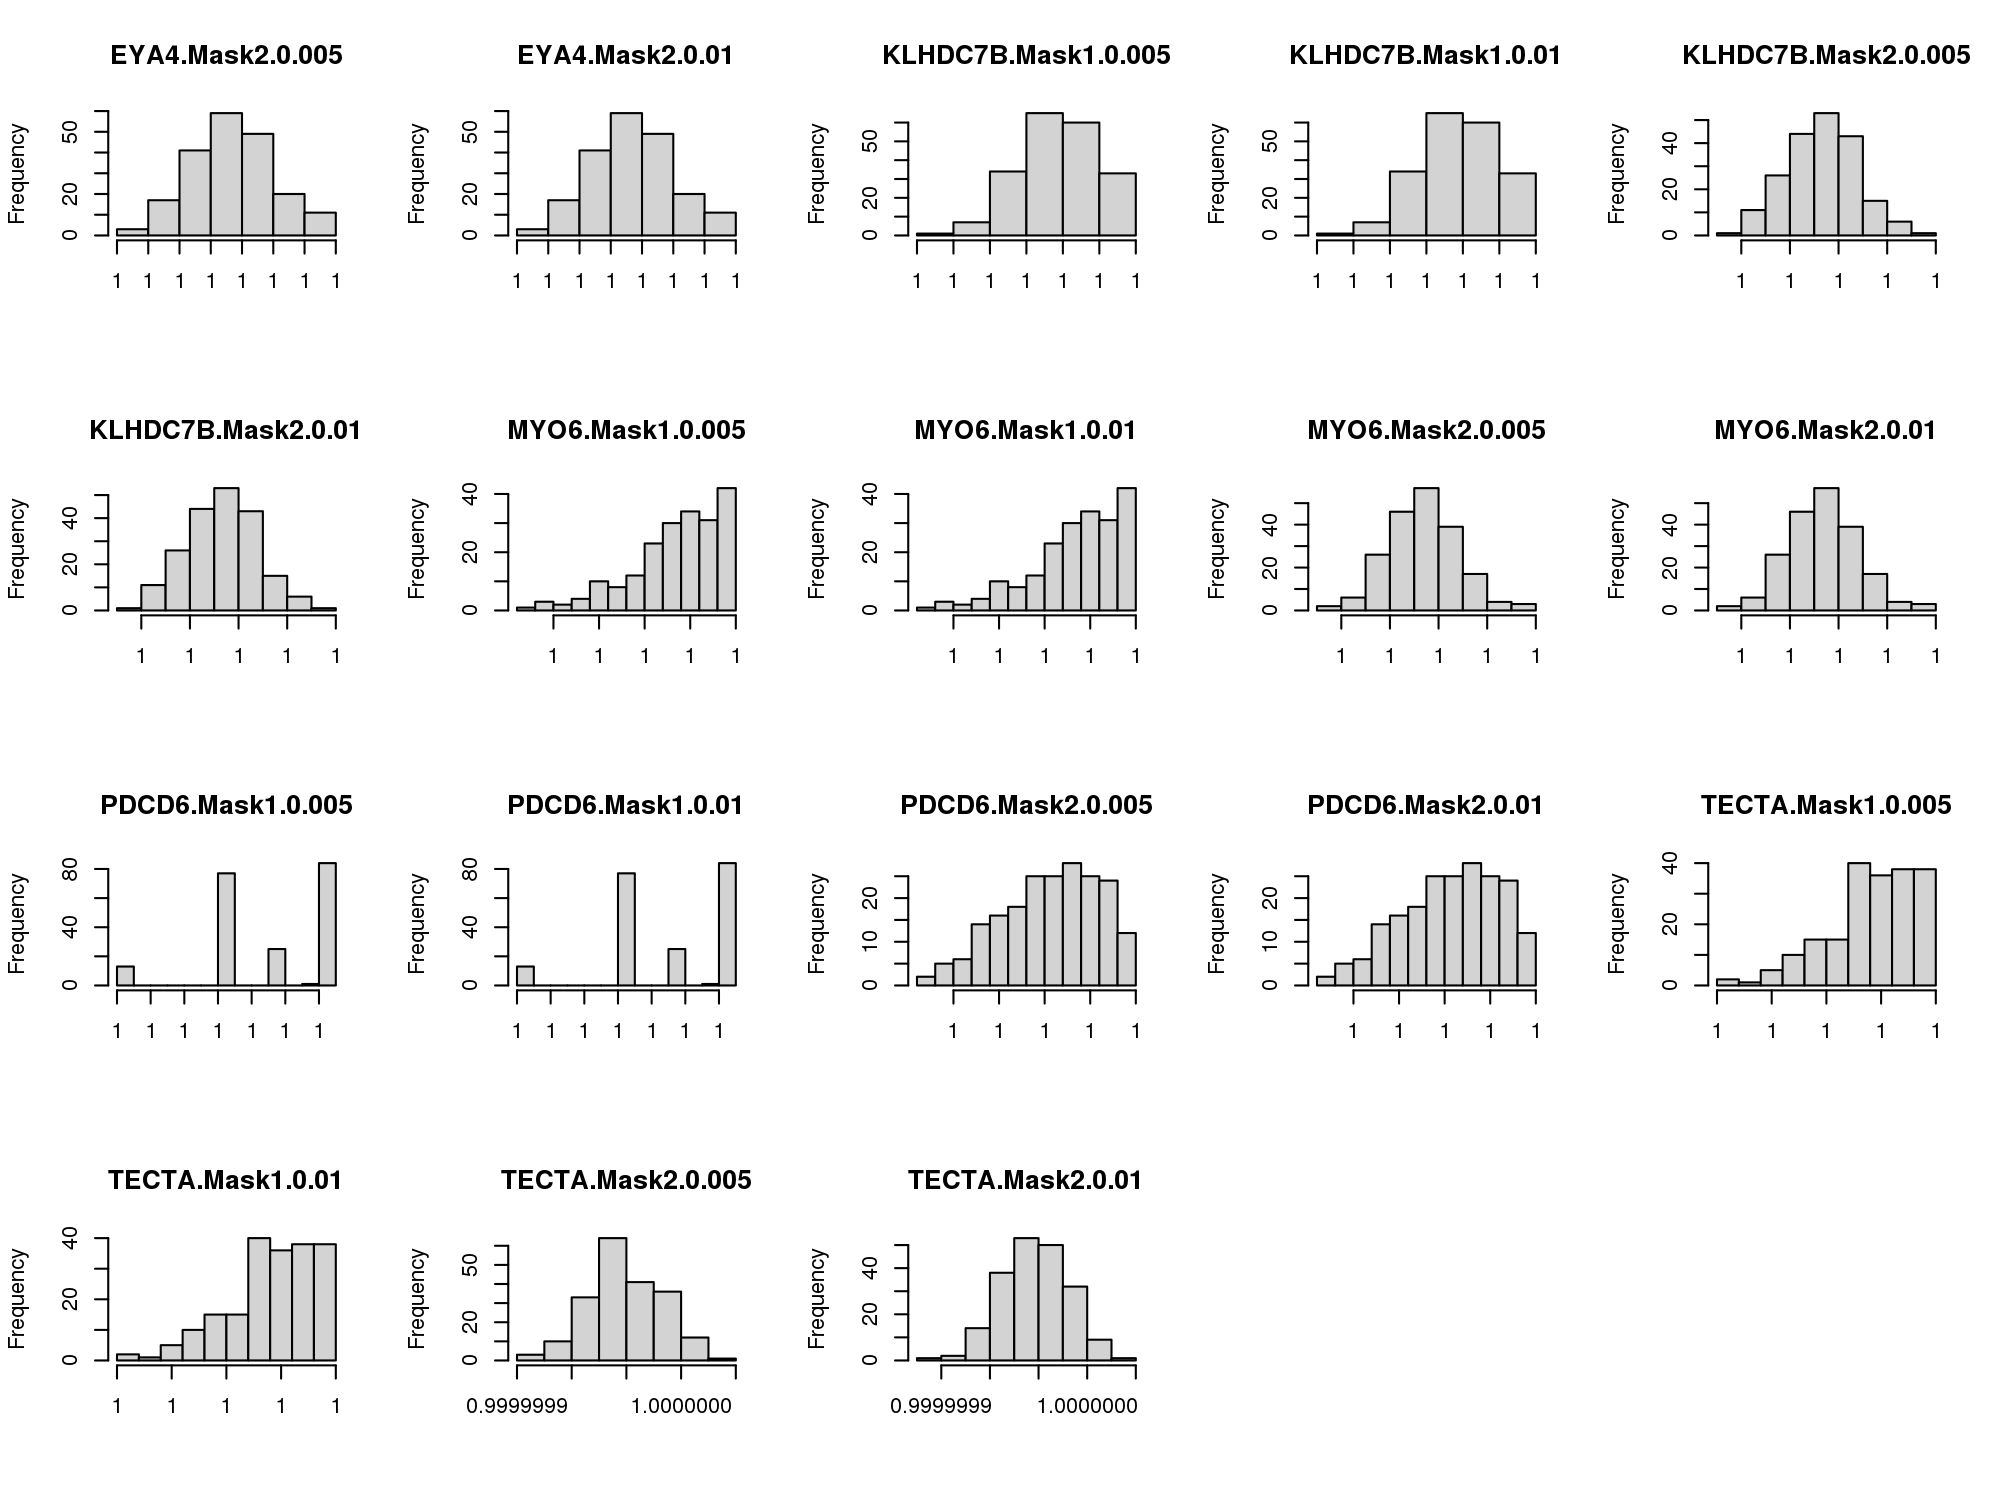

In [13]:
p <- read.table("~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f3393/f3393.merge.regenie_p",sep="\t",header=TRUE)
par(mfrow = c(4, 5))
for (i in 3:nrow(p)){
    hist(as.numeric(p[i,-c(1:3)]),main=p[i,1],xlab="")
}

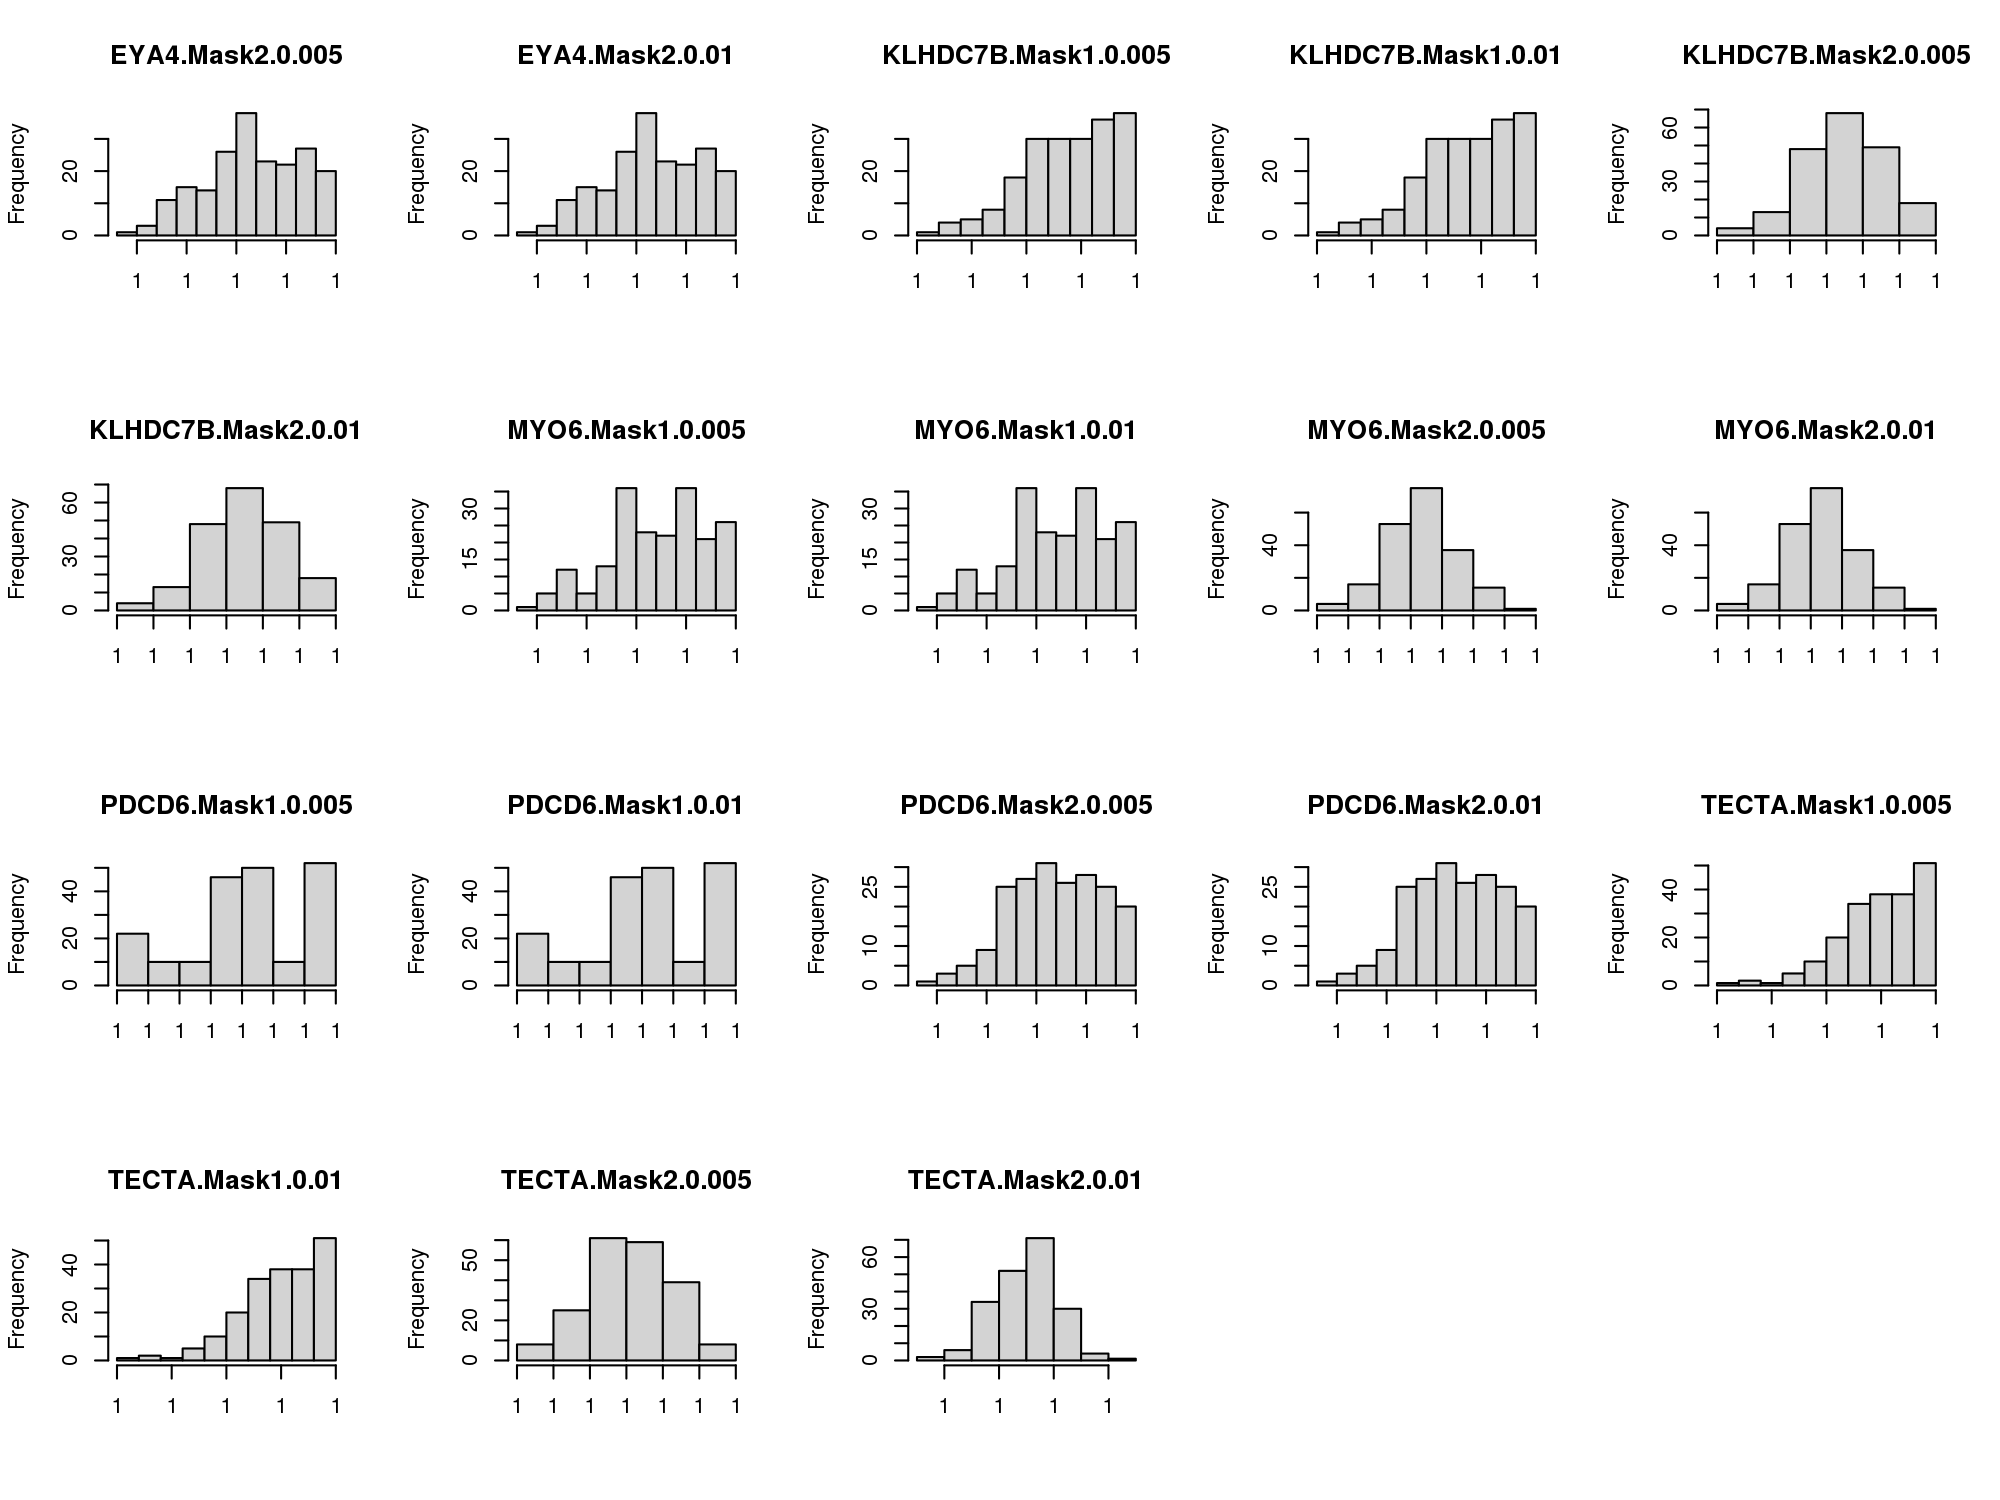

In [14]:
p <- read.table("~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f2247/f2247.merge.regenie_p",sep="\t",header=TRUE)
par(mfrow = c(4, 5))
for (i in 3:nrow(p)){
    hist(as.numeric(p[i,-c(1:3)]),main=p[i,1],xlab="")
}

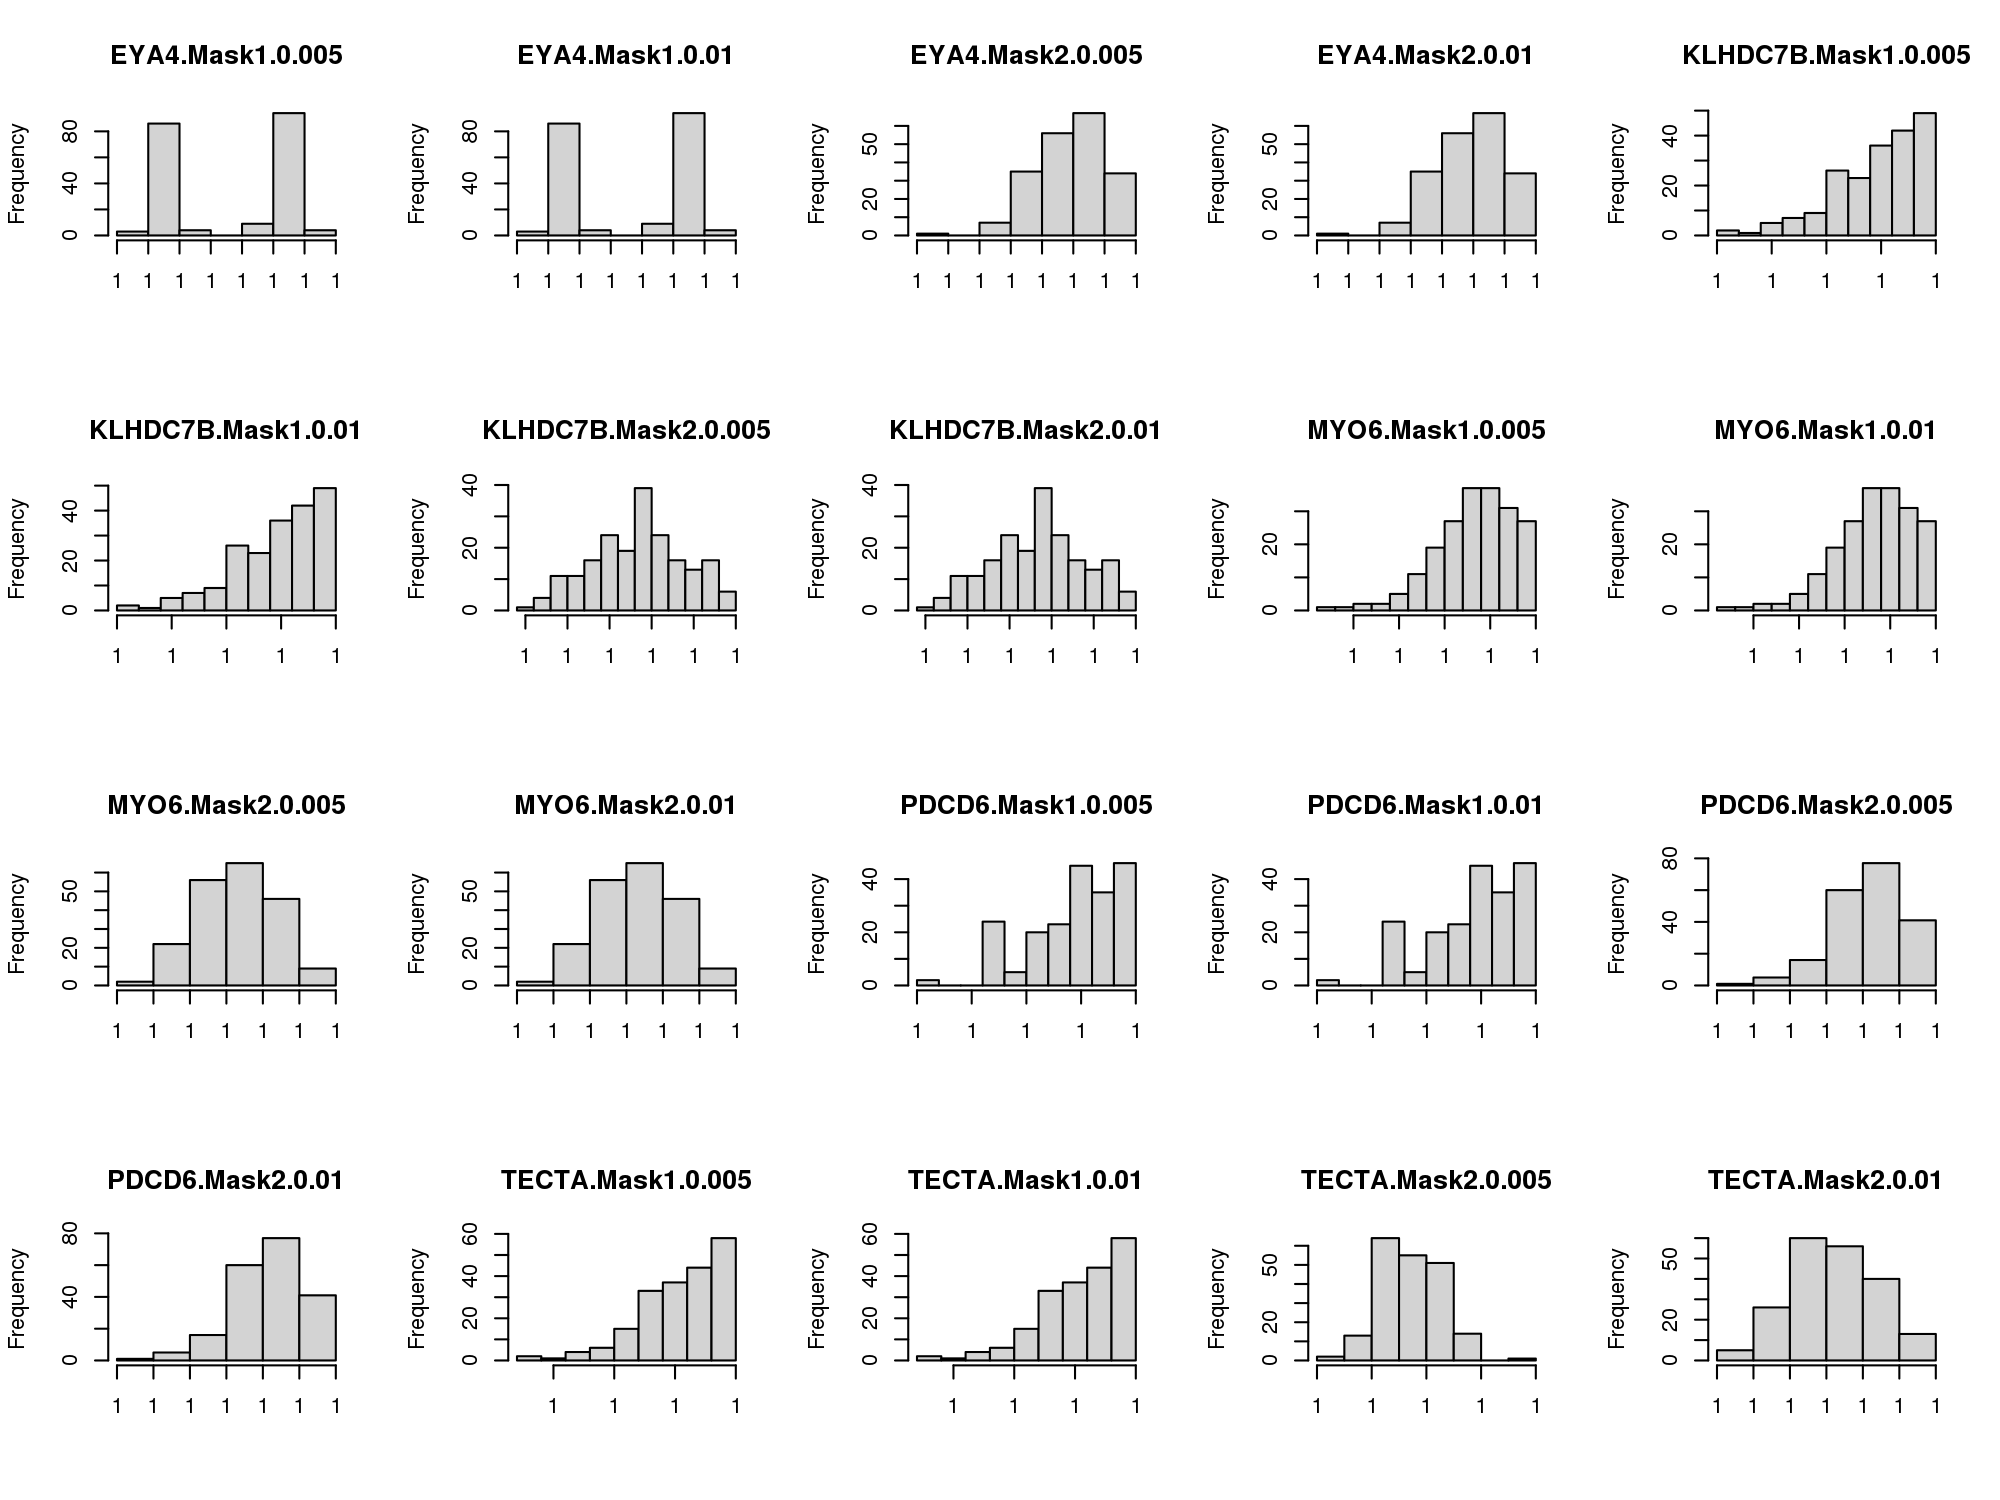

In [15]:
p <- read.table("~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f2257/f2257.merge.regenie_p",sep="\t",header=TRUE)
par(mfrow = c(4, 5))
for (i in 1:nrow(p)){
    hist(as.numeric(p[i,-c(1:3)]),main=p[i,1],xlab="")
}

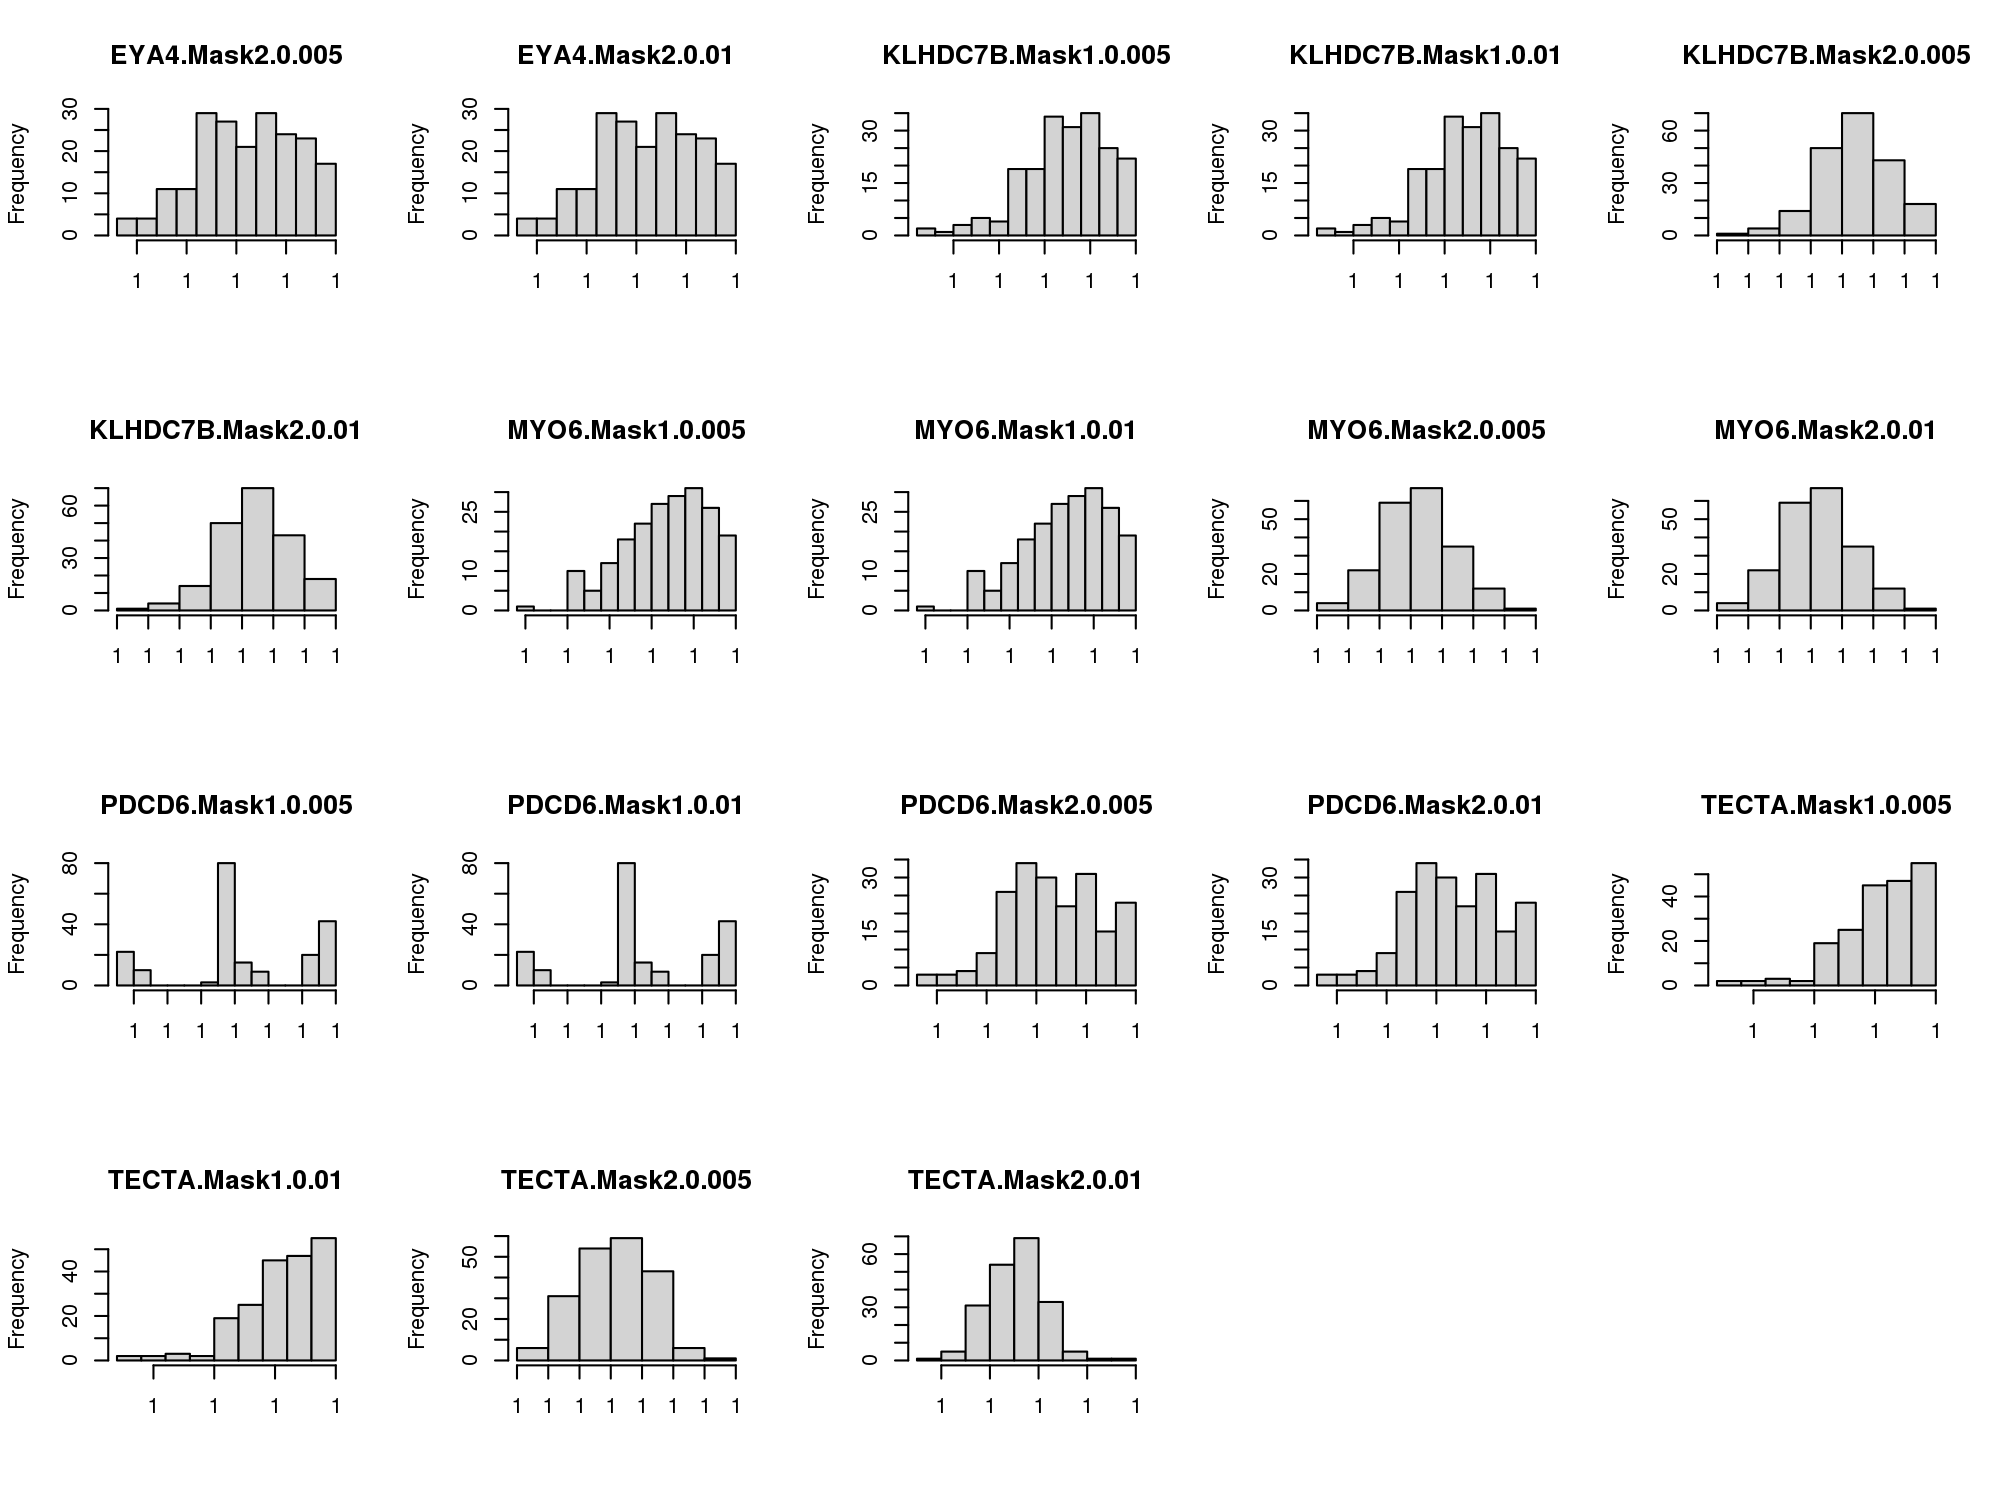

In [16]:
p <- read.table("~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_eachtrait/2022_03_27_f2247_f2257/f2247_f2257.merge.regenie_p",sep="\t",header=TRUE)
par(mfrow = c(4, 5))
for (i in 3:nrow(p)){
    hist(as.numeric(p[i,-c(1:3)]),main=p[i,1],xlab="")
}

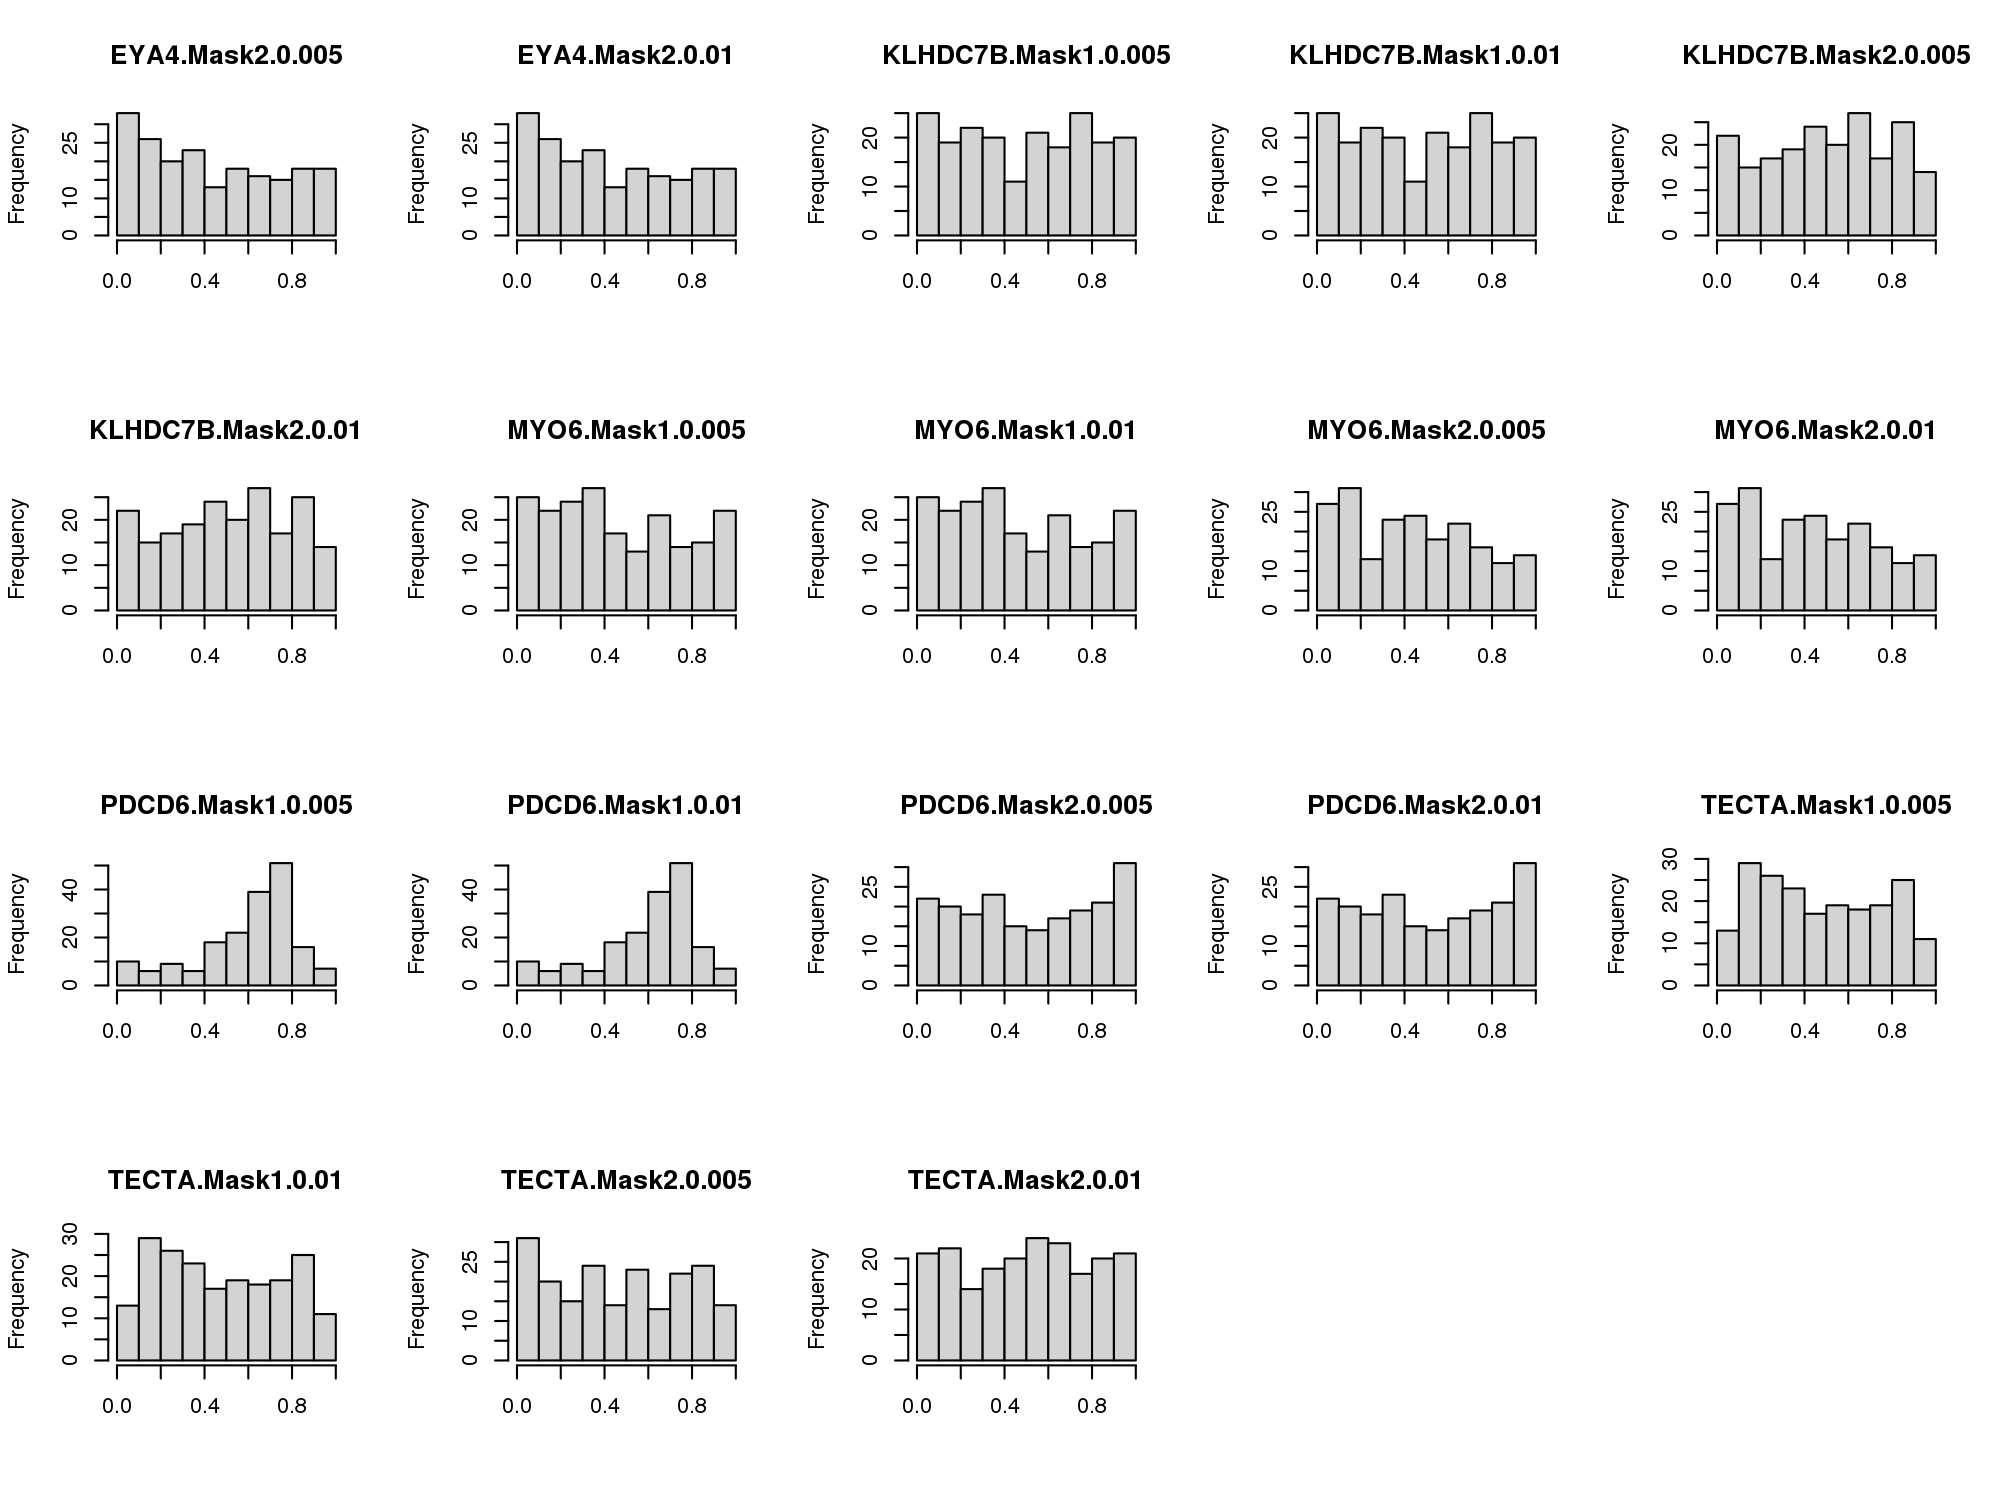

In [23]:
p <- read.table("~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/2022_03_27_f3393/f3393.merge.regenie_p",sep="\t",header=TRUE)
par(mfrow = c(4, 5))
for (i in 3:nrow(p)){
    hist(as.numeric(p[i,-c(1:3)]),main=p[i,1],xlab="")
}

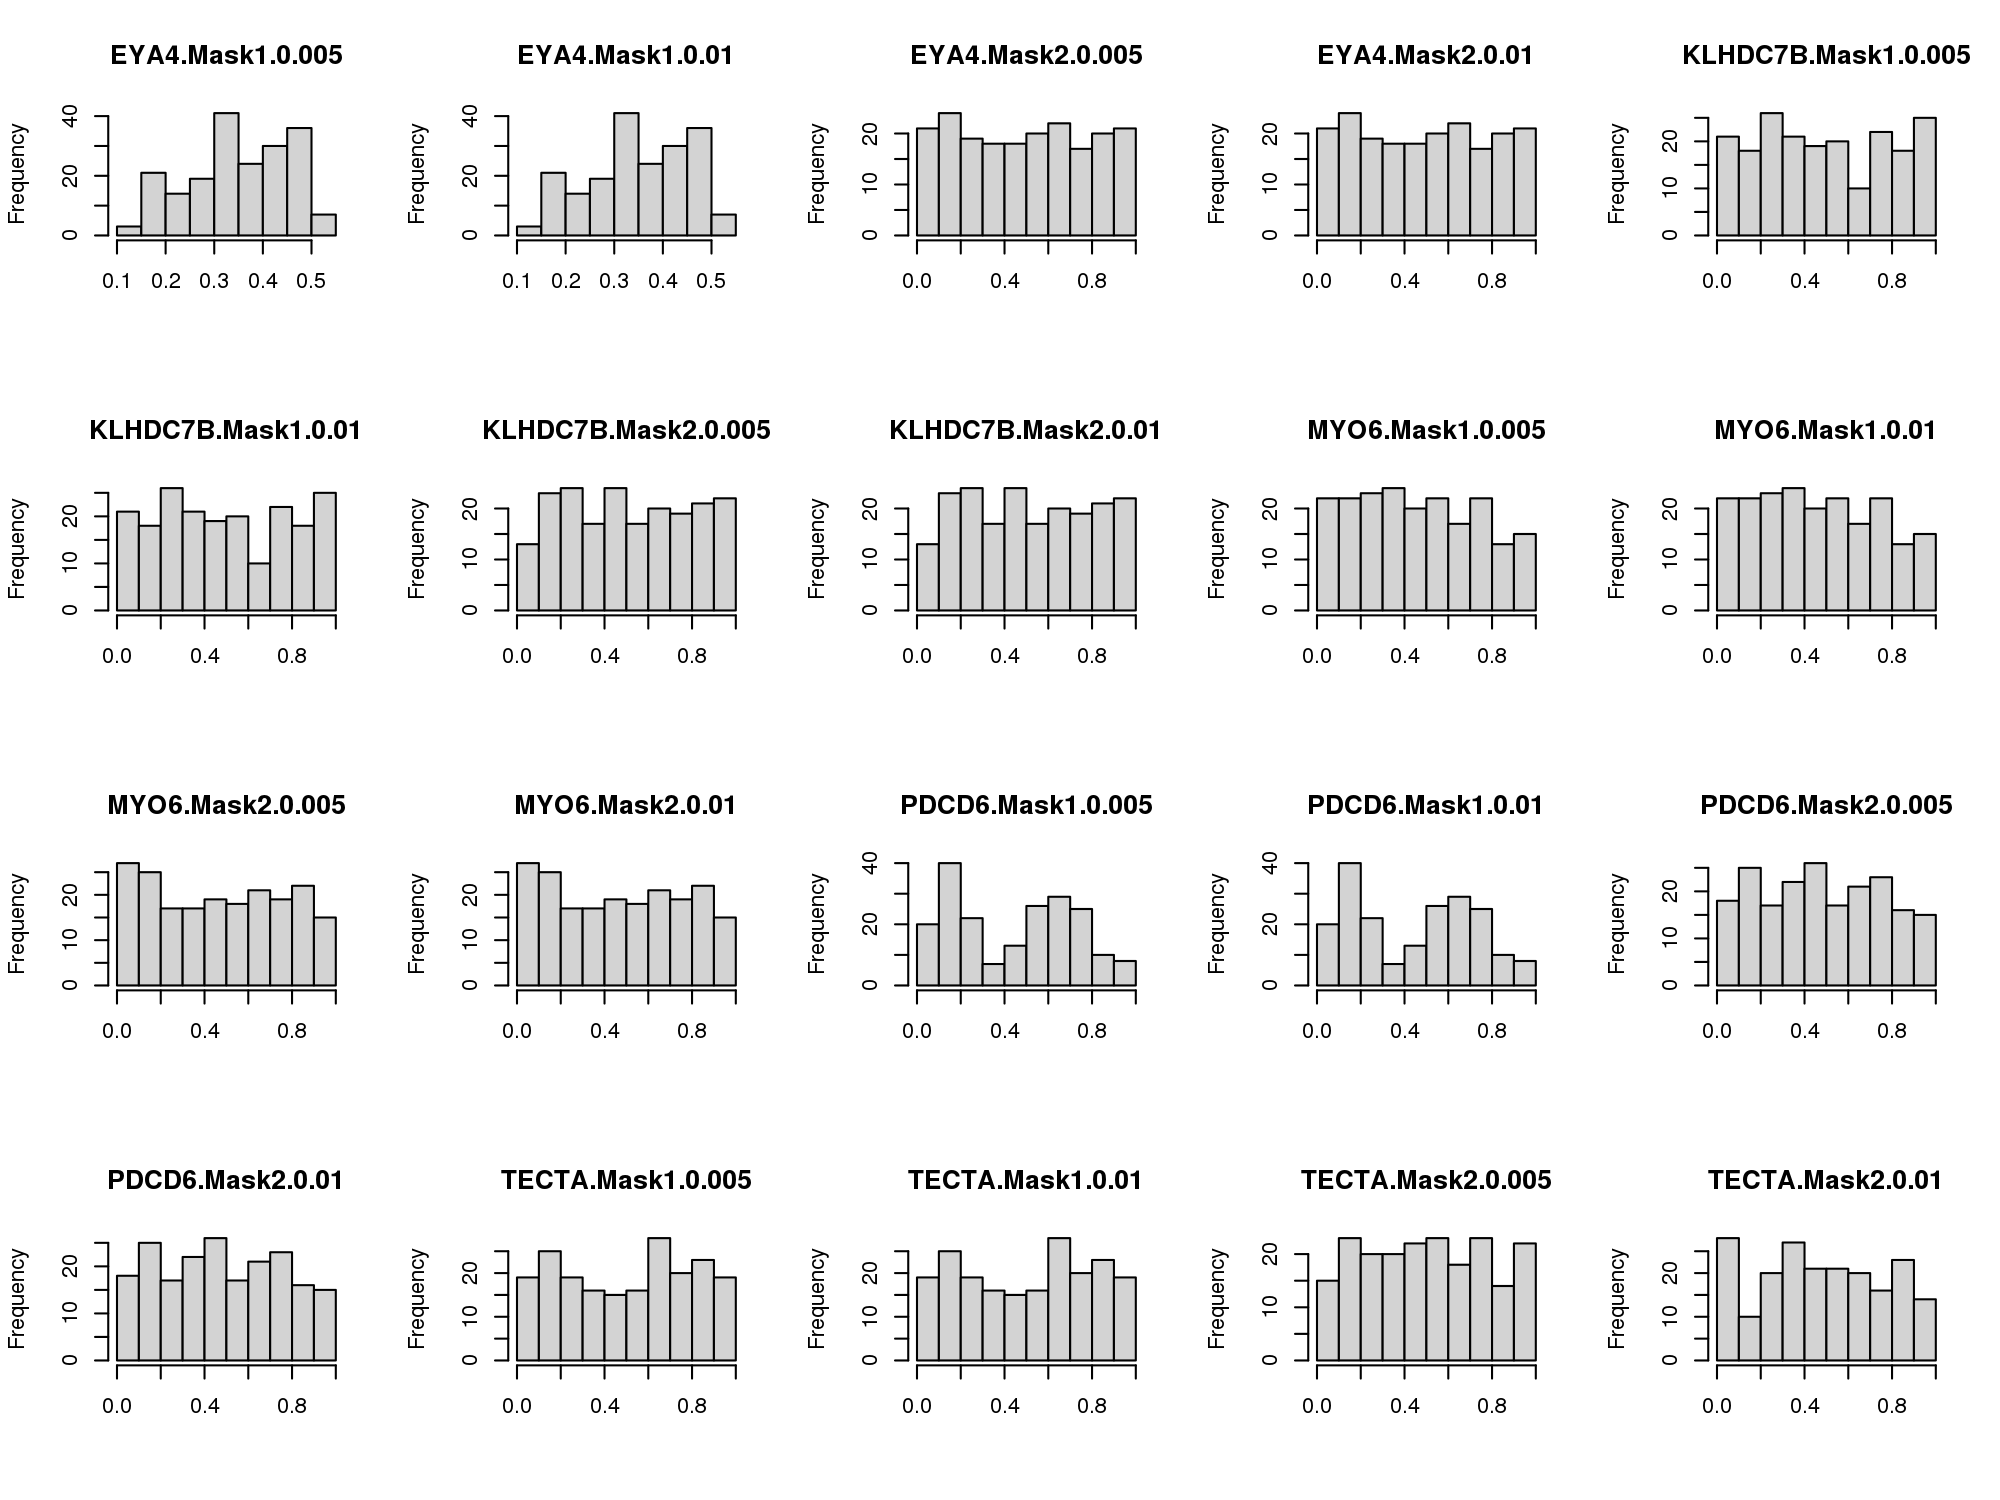

In [18]:
p <- read.table("~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/2022_03_27_f2257/f2257.merge.regenie_p",sep="\t",header=TRUE)
par(mfrow = c(4, 5))
for (i in 1:nrow(p)){
    hist(as.numeric(p[i,-c(1:3)]),main=p[i,1],xlab="")
}

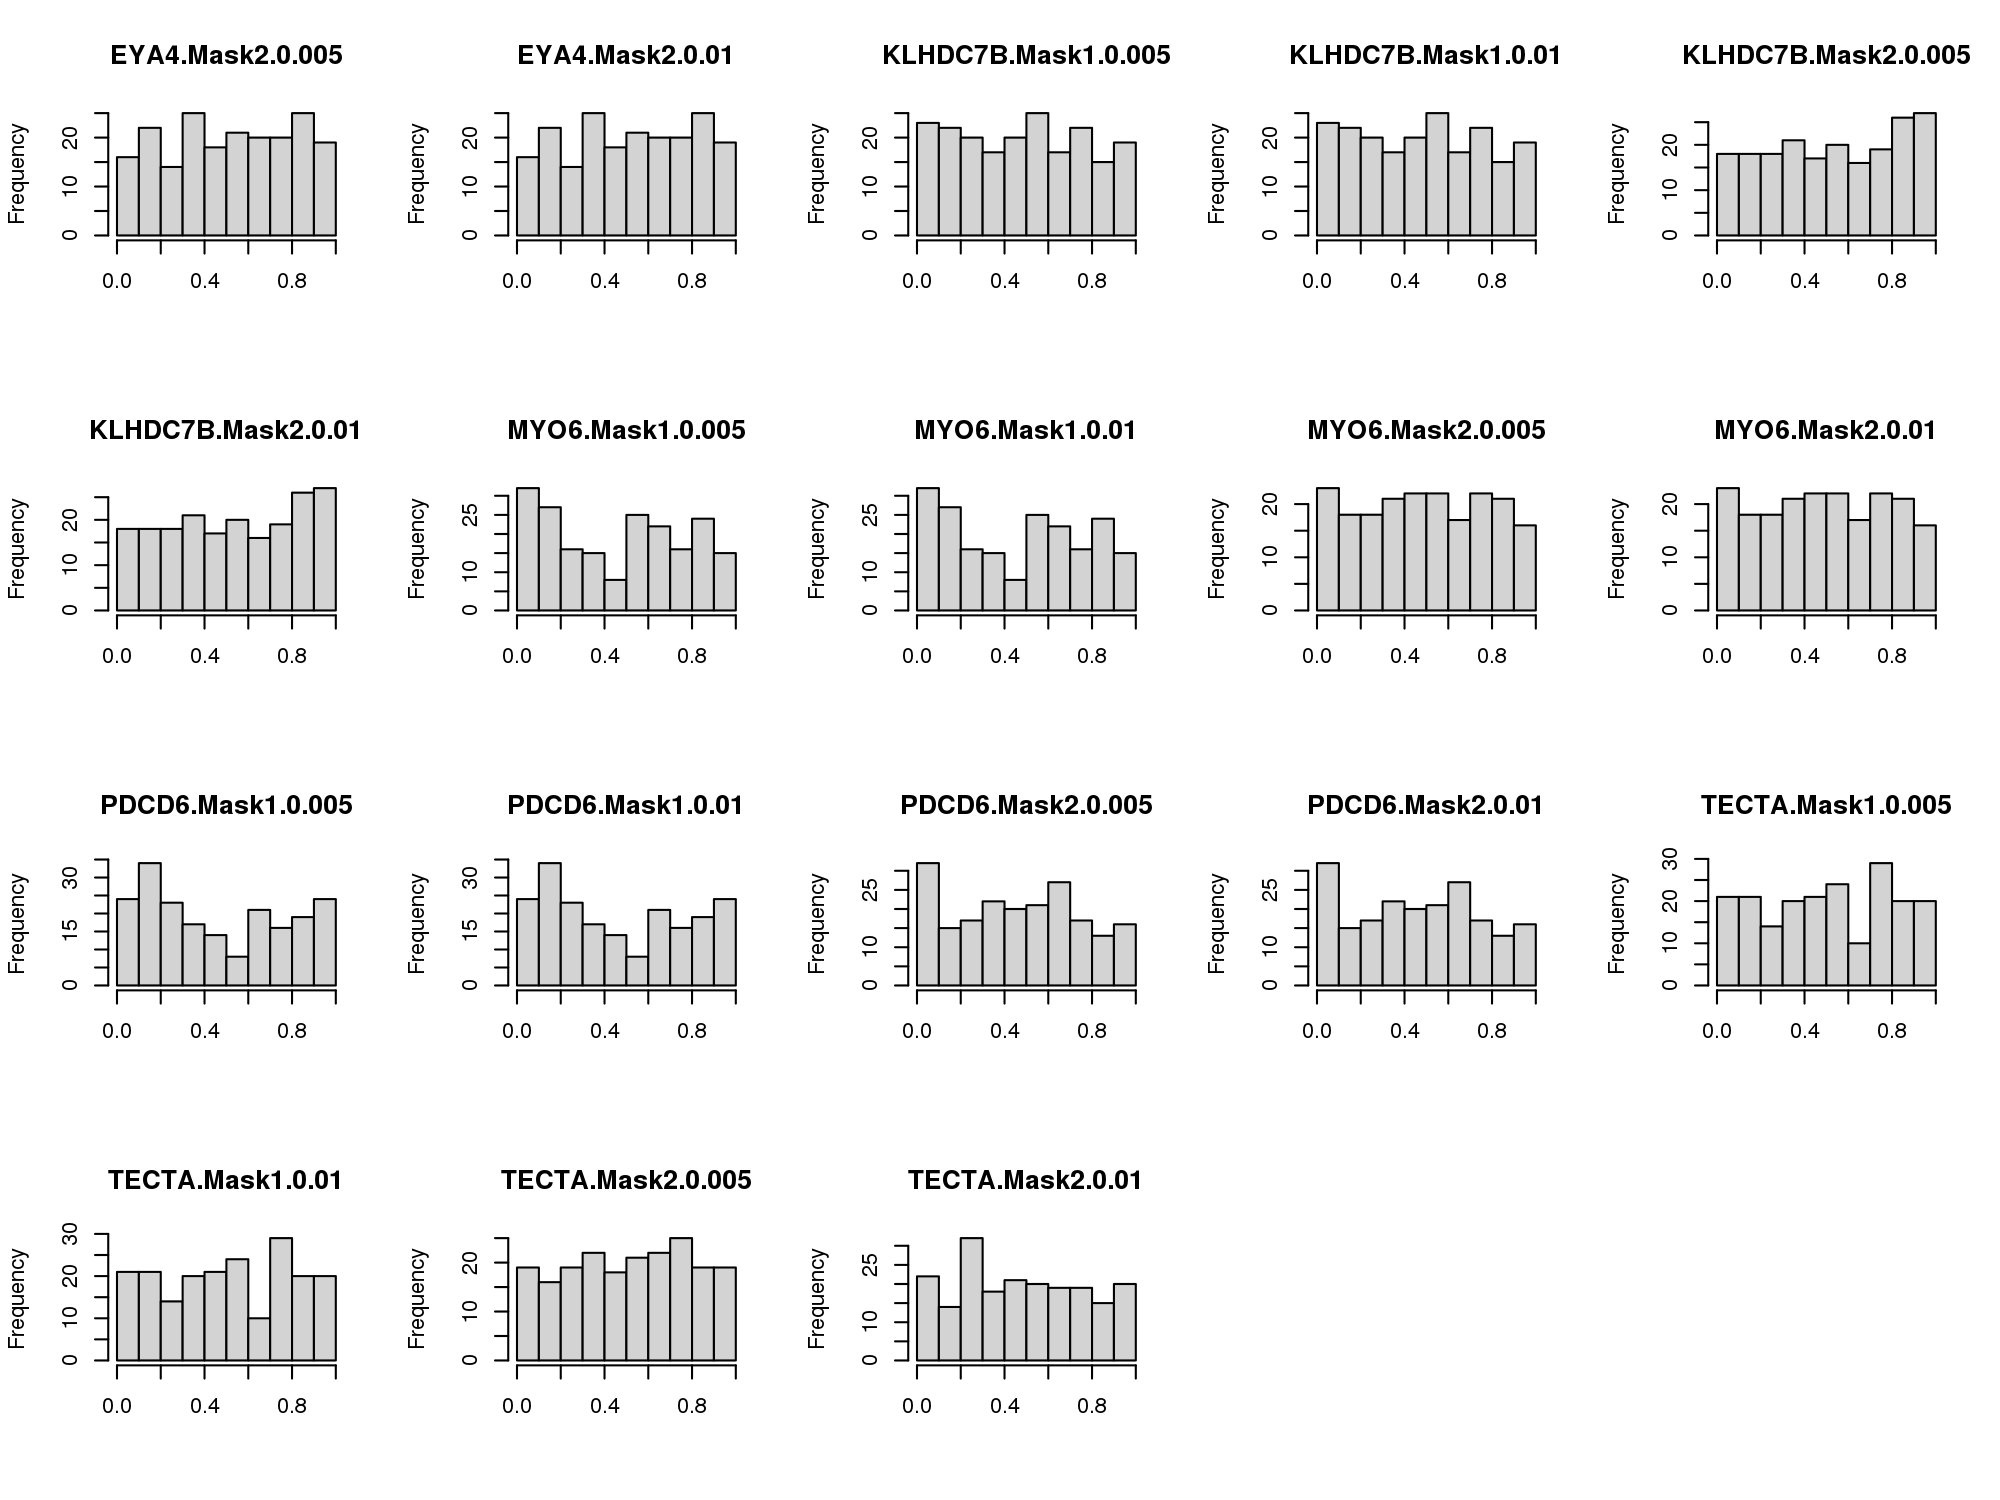

In [20]:
p <- read.table("~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/2022_03_27_f2247/f2247.merge.regenie_p",sep="\t",header=TRUE)
par(mfrow = c(4, 5))
for (i in 3:nrow(p)){
    hist(as.numeric(p[i,-c(1:3)]),main=p[i,1],xlab="")
}

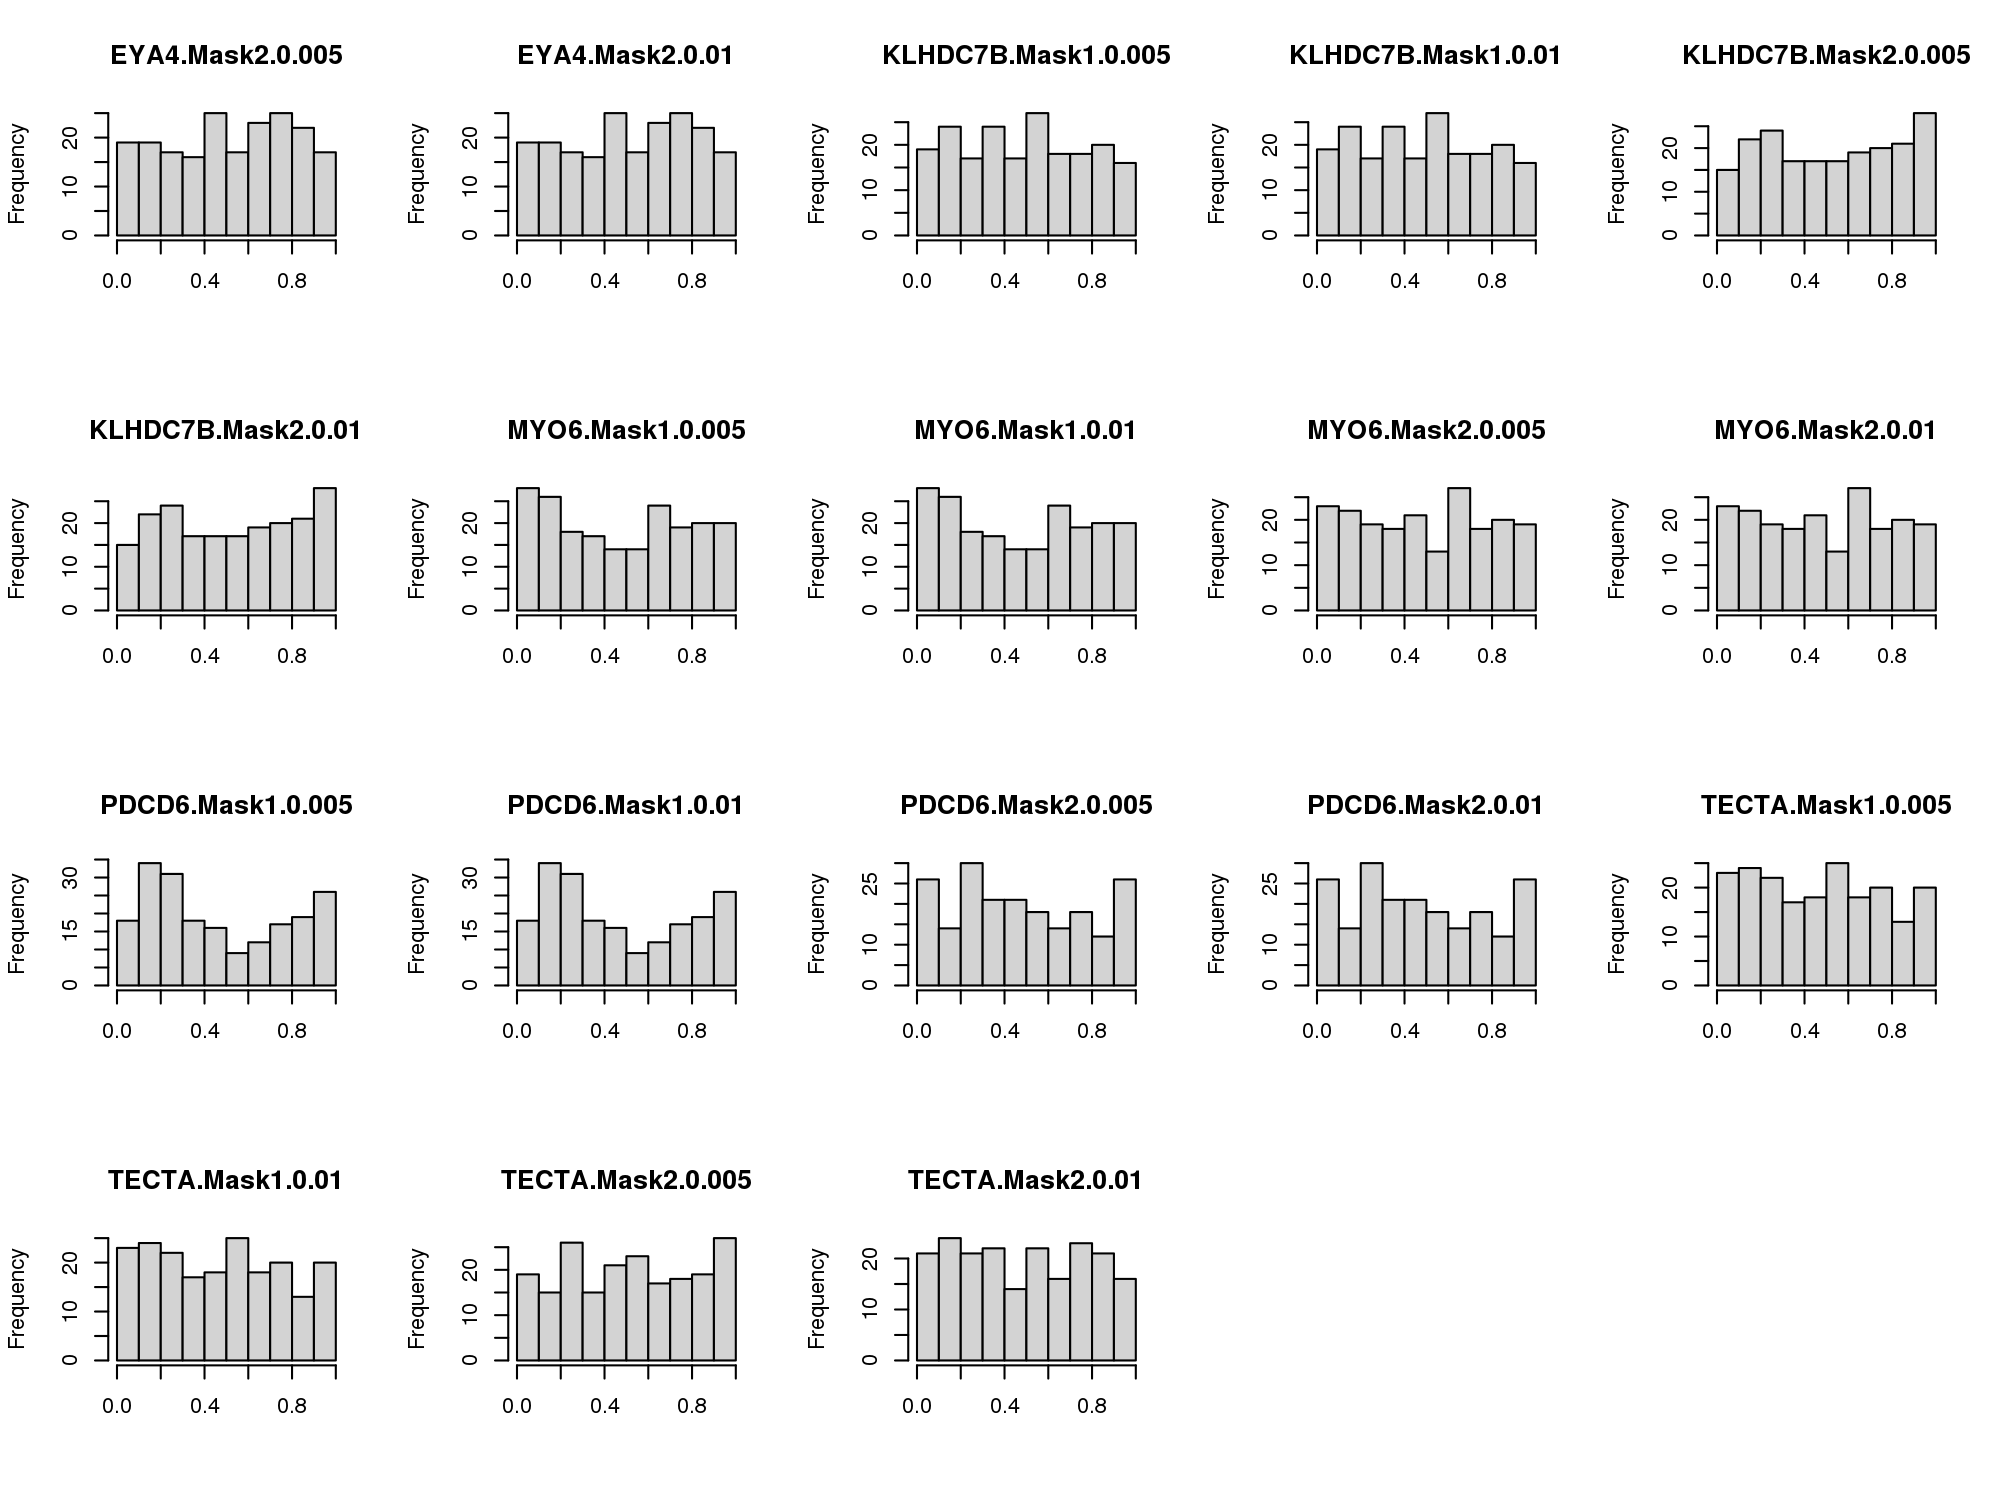

In [22]:
p <- read.table("~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/permutation_alltraits/2022_03_27_f2247_f2257/f2247_f2257.merge.regenie_p",sep="\t",header=TRUE)
par(mfrow = c(4, 5))
for (i in 3:nrow(p)){
    hist(as.numeric(p[i,-c(1:3)]),main=p[i,1],xlab="")
}

# Burden 100k permutation

In [2]:
for j in range(1,11):
    phe="/home/gl2776/project/guangyou/20220314_permutation/files_100000/permutation/f3393.discovery."+str((j-1)*10000+1)+".regenie_phenotype"
    for i in range((j-1)*10000+2,j*10000+1):
        phe = phe + " /home/gl2776/project/guangyou/20220314_permutation/files_100000/permutation/f3393.discovery."+str(i)+".regenie_phenotype"
    scripts ='''#!/bin/sh
#$ -l h_rt=48:00:00
#$ -l h_vmem=5G
#$ -N f3393_hearing_aid_permutation-%i-regenie-burden_2022-03-27
#$ -o /home/gl2776/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f3393/f3393_hearing_aid_permutation-%i-regenie-burden_2022-03-27-$JOB_ID.out
#$ -e /home/gl2776/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f3393/f3393_hearing_aid_permutation-%i-regenie-burden_2022-03-27-$JOB_ID.err  
#$ -j y
#$ -q csg.q
#$ -S /bin/bash
export PATH=$HOME/miniconda3/bin:$PATH
module load Singularity/3.5.3
sos run /home/gl2776/working/Ghana/Reg.ipynb \
    regenie_burden\
    --cwd /home/gl2776/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f3393 \
    --bfile /mnt/mfs/statgen/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed \
    --genoFile /home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes.bed\
    --phenoFile %s \
    --formatFile /home/gl2776/working/UKBB_GWAS_dev/data/regenie_template.yml \
    --phenoCol f3393\
    --covarCol sex  \
    --qCovarCol age PC1 PC2\
    --bsize 1000\
    --trait bt\
    --anno_file /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.anno_file\
    --set_list /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.set_list_file\
    --mask_file /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_101321.hg38.hg38_multianno.renamedcols.mask_file\
    --aaf_file /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.aff_file\
    --aaf_bins 0.005 0.01\
    --build_mask max\
    --job_size 10\
    --ylim 10\
    --reverse_log_p True\
    --numThreads 2\
    --minMAC 1\
    --container_lmm /home/gl2776/containers/lmm.sif\
    --container_marp /home/gl2776/containers/marp.sif \
    -c /home/gl2776/working/bioworkflows/admin/csg.yml \
    -q csg -s build \
    &> /home/gl2776/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f3393/f3393_hearing_aid_permutation-%i-regenie-burden_2022-03-27.log
'''%(j,j,j,phe,j)

    file = open("/home/gl2776/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f3393/f3393_hearing_aid_permutation-"+str(j)+"-regenie-burden_2022-03-27.sbatch","w")#append mode
    file.write(scripts)
    file.close()

In [6]:
for j in range(1,11):
    phe="/home/gl2776/project/guangyou/20220314_permutation/files_100000/permutation/f2247.discovery."+str((j-1)*10000+1)+".regenie_phenotype"
    for i in range((j-1)*10000+2,j*10000+1):
        phe = phe + " /home/gl2776/project/guangyou/20220314_permutation/files_100000/permutation/f2247.discovery."+str(i)+".regenie_phenotype"
    scripts ='''#!/bin/sh
#$ -l h_rt=48:00:00
#$ -l h_vmem=5G
#$ -N f2247_permutation-%i-regenie-burden_2022-03-27
#$ -o /home/gl2776/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2247/permutation-%i-regenie-burden_2022-03-27-$JOB_ID.out
#$ -e /home/gl2776/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2247/permutation-%i-regenie-burden_2022-03-27-$JOB_ID.err  
#$ -j y
#$ -q csg.q
#$ -S /bin/bash
export PATH=$HOME/miniconda3/bin:$PATH
module load Singularity/3.5.3
sos run /home/gl2776/working/Ghana/Reg.ipynb \
    regenie_burden\
    --cwd /home/gl2776/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2247 \
    --bfile /mnt/mfs/statgen/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed \
    --genoFile /home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes.bed\
    --phenoFile %s \
    --formatFile /home/gl2776/working/UKBB_GWAS_dev/data/regenie_template.yml \
    --phenoCol f2247\
    --covarCol sex  \
    --qCovarCol age PC1 PC2\
    --bsize 1000\
    --trait bt\
    --anno_file /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.anno_file\
    --set_list /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.set_list_file\
    --mask_file /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_101321.hg38.hg38_multianno.renamedcols.mask_file\
    --aaf_file /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.aff_file\
    --aaf_bins 0.005 0.01\
    --build_mask max\
    --job_size 10\
    --ylim 10\
    --reverse_log_p True\
    --numThreads 2\
    --minMAC 1\
    --container_lmm /home/gl2776/containers/lmm.sif\
    --container_marp /home/gl2776/containers/marp.sif \
    -c /home/gl2776/working/bioworkflows/admin/csg.yml \
    -q csg -s build \
    &> /home/gl2776/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2247/permutation-%i-regenie-burden_2022-03-27.log
'''%(j,j,j,phe,j)

    file = open("/home/gl2776/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2247/permutation-"+str(j)+"-regenie-burden_2022-03-27.sbatch","w")#append mode
    file.write(scripts)
    file.close()

In [7]:
for j in range(1,11):
    phe="/home/gl2776/project/guangyou/20220314_permutation/files_100000/permutation/f2257.discovery."+str((j-1)*10000+1)+".regenie_phenotype"
    for i in range((j-1)*10000+2,j*10000+1):
        phe = phe + " /home/gl2776/project/guangyou/20220314_permutation/files_100000/permutation/f2257.discovery."+str(i)+".regenie_phenotype"
    scripts ='''#!/bin/sh
#$ -l h_rt=48:00:00
#$ -l h_vmem=5G
#$ -N f2257_permutation-%i-regenie-burden_2022-03-27
#$ -o /home/gl2776/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2257/permutation-%i-regenie-burden_2022-03-27-$JOB_ID.out
#$ -e /home/gl2776/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2257/permutation-%i-regenie-burden_2022-03-27-$JOB_ID.err  
#$ -j y
#$ -q csg.q
#$ -S /bin/bash
export PATH=$HOME/miniconda3/bin:$PATH
module load Singularity/3.5.3
sos run /home/gl2776/working/Ghana/Reg.ipynb \
    regenie_burden\
    --cwd /home/gl2776/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2257 \
    --bfile /mnt/mfs/statgen/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed \
    --genoFile /home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes.bed\
    --phenoFile %s \
    --formatFile /home/gl2776/working/UKBB_GWAS_dev/data/regenie_template.yml \
    --phenoCol f2257\
    --covarCol sex  \
    --qCovarCol age PC1 PC2\
    --bsize 1000\
    --trait bt\
    --anno_file /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.anno_file\
    --set_list /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.set_list_file\
    --mask_file /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_101321.hg38.hg38_multianno.renamedcols.mask_file\
    --aaf_file /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.aff_file\
    --aaf_bins 0.005 0.01\
    --build_mask max\
    --job_size 10\
    --ylim 10\
    --reverse_log_p True\
    --numThreads 2\
    --minMAC 1\
    --container_lmm /home/gl2776/containers/lmm.sif\
    --container_marp /home/gl2776/containers/marp.sif \
    -c /home/gl2776/working/bioworkflows/admin/csg.yml \
    -q csg -s build \
    &> /home/gl2776/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2257/permutation-%i-regenie-burden_2022-03-27.log
'''%(j,j,j,phe,j)

    file = open("/home/gl2776/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2257/permutation-"+str(j)+"-regenie-burden_2022-03-27.sbatch","w")#append mode
    file.write(scripts)
    file.close()

In [8]:
for j in range(1,11):
    phe="/home/gl2776/project/guangyou/20220314_permutation/files_100000/permutation/f2247_f2257.discovery."+str((j-1)*10000+1)+".regenie_phenotype"
    for i in range((j-1)*10000+2,j*10000+1):
        phe = phe + " /home/gl2776/project/guangyou/20220314_permutation/files_100000/permutation/f2247_f2257.discovery."+str(i)+".regenie_phenotype"
    scripts ='''#!/bin/sh
#$ -l h_rt=48:00:00
#$ -l h_vmem=5G
#$ -N f2247_f2257_permutation-%i-regenie-burden_2022-03-27
#$ -o /home/gl2776/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2247_f2257/permutation-%i-regenie-burden_2022-03-27-$JOB_ID.out
#$ -e /home/gl2776/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2247_f2257/permutation-%i-regenie-burden_2022-03-27-$JOB_ID.err  
#$ -j y
#$ -q csg.q
#$ -S /bin/bash
export PATH=$HOME/miniconda3/bin:$PATH
module load Singularity/3.5.3
sos run /home/gl2776/working/Ghana/Reg.ipynb \
    regenie_burden\
    --cwd /home/gl2776/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2247_f2257 \
    --bfile /mnt/mfs/statgen/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed \
    --genoFile /home/gl2776/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/files/genome_genes.bed\
    --phenoFile %s \
    --formatFile /home/gl2776/working/UKBB_GWAS_dev/data/regenie_template.yml \
    --phenoCol f2247_f2257\
    --covarCol sex  \
    --qCovarCol age PC1 PC2\
    --bsize 1000\
    --trait bt\
    --anno_file /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.anno_file\
    --set_list /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.set_list_file\
    --mask_file /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_101321.hg38.hg38_multianno.renamedcols.mask_file\
    --aaf_file /mnt/mfs/statgen/UKBiobank/results/REGENIE_results/results_burden_exome/102121_burden_files/ukb23155_chr1_chr22_091321.hg38.hg38_multianno.renamedcols.csv.aff_file\
    --aaf_bins 0.005 0.01\
    --build_mask max\
    --job_size 10\
    --ylim 10\
    --reverse_log_p True\
    --numThreads 2\
    --minMAC 1\
    --container_lmm /home/gl2776/containers/lmm.sif\
    --container_marp /home/gl2776/containers/marp.sif \
    -c /home/gl2776/working/bioworkflows/admin/csg.yml \
    -q csg -s build \
    &> /home/gl2776/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2247_f2257/permutation-%i-regenie-burden_2022-03-27.log
'''%(j,j,j,phe,j)

    file = open("/home/gl2776/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2247_f2257/permutation-"+str(j)+"-regenie-burden_2022-03-27.sbatch","w")#append mode
    file.write(scripts)
    file.close()

In [ ]:
pathfrom=~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f3393
pathto=~/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f3393
cp ${pathfrom}/*.loco   ${pathto}/
cp ${pathfrom}/*regenie_pred.list   ${pathto}/
pathfrom=~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f2247
pathto=~/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2247
cp ${pathfrom}/*.loco   ${pathto}/
cp ${pathfrom}/*regenie_pred.list   ${pathto}/
pathfrom=~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f2257
pathto=~/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2257
cp ${pathfrom}/*.loco   ${pathto}/
cp ${pathfrom}/*regenie_pred.list   ${pathto}/
pathfrom=~/UKBiobank/results/REGENIE_results/results_burden_exome/032622_permutation/2022_03_26_f2247_f2257
pathto=~/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2247_f2257
cp ${pathfrom}/*.loco   ${pathto}/
cp ${pathfrom}/*regenie_pred.list   ${pathto}/

In [ ]:
for i in {1..10}
do
qsub /home/gl2776/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f3393/f3393_hearing_aid_permutation-${i}-regenie-burden_2022-03-27.sbatch
done

In [ ]:
for i in {1..10}
do
qsub /home/gl2776/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2247/permutation-${i}-regenie-burden_2022-03-27.sbatch
done

In [ ]:
for i in {1..10}
do
qsub /home/gl2776/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2257/permutation-${i}-regenie-burden_2022-03-27.sbatch
done

In [ ]:
for i in {1..10}
do
qsub /home/gl2776/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2247_f2257/permutation-${i}-regenie-burden_2022-03-27.sbatch
done

In [14]:
## burden each trait
import pandas as pd
data = pd.read_csv("~/project/UKBiobank/results/REGENIE_results/results_burden_exome/50k/091321_f3393_hearing_aid/090321_UKBB_Hearing_aid_f3393_expandedwhite_24189ind_50K_f3393.regenie_burden.snp_stats_original_columns.gz",compression = "gzip",sep="\t",header=0)
data                 

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
0,1,33306677,A3GALT2.Mask1.singleton,ref,Mask1.singleton,0.000062,24189,ADD,2.754220,1.214710,4.69387,1.518980,NaN
1,1,12716241,AADACL3.Mask1.singleton,ref,Mask1.singleton,0.000062,24189,ADD,-1.043580,2.936880,0.126264,0.141260,NaN
2,1,12644447,AADACL4.Mask1.singleton,ref,Mask1.singleton,0.000021,24189,ADD,-1.007460,11.720200,0.007389,0.030818,NaN
3,1,93993138,ABCA4.Mask1.singleton,ref,Mask1.singleton,0.000351,24189,ADD,-1.100650,0.984732,1.24928,0.578907,NaN
4,1,229518125,ABCB10.Mask1.singleton,ref,Mask1.singleton,0.000165,24189,ADD,-1.081390,1.589800,0.462684,0.304193,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99905,22,22513971,ZNF280A.Mask2.0.01,ref,Mask2.0.01,0.305035,24189,ADD,0.008636,0.040575,0.0452988,0.080161,NaN
99906,22,22487698,ZNF280B.Mask2.0.01,ref,Mask2.0.01,0.092253,24189,ADD,-0.073836,0.064117,1.32614,0.602943,NaN
99907,22,23743709,ZNF70.Mask2.0.01,ref,Mask2.0.01,0.010004,24189,ADD,0.063108,0.189993,0.11033,0.130904,NaN
99908,22,20394529,ZNF74.Mask2.0.01,ref,Mask2.0.01,0.011472,24189,ADD,0.145496,0.170193,0.730826,0.406033,NaN


In [15]:
target = ["KLHDC7B.Mask1.0.01","TECTA.Mask1.0.01","EYA4.Mask1.0.01","PDCD6.Mask2.0.01","MYO6.Mask2.0.01"]
data = data[data["ID"].isin(target)]
data

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
31260,5,271678,PDCD6.Mask2.0.01,ref,Mask2.0.01,0.002646,24189,ADD,0.982318,0.264229,11.6894,3.201650,NaN
36648,6,75817495,MYO6.Mask2.0.01,ref,Mask2.0.01,0.014676,24189,ADD,0.383209,0.134267,7.58296,2.229720,NaN
56483,11,121102610,TECTA.Mask1.0.01,ref,Mask1.0.01,0.000455,24189,ADD,1.284060,0.707980,3.28947,1.156610,NaN
98447,22,50548069,KLHDC7B.Mask1.0.01,ref,Mask1.0.01,0.000847,24189,ADD,-0.506879,0.767510,0.436155,0.293296,NaN


In [16]:
result = data[["CHROM","GENPOS","ID"]].copy()
result["f3393"] = 10**(-data[["LOG10P"]])
result

,CHROM,GENPOS,ID,f3393
31260,5,271678,PDCD6.Mask2.0.01,0.000629
36648,6,75817495,MYO6.Mask2.0.01,0.005892
56483,11,121102610,TECTA.Mask1.0.01,0.069725
98447,22,50548069,KLHDC7B.Mask1.0.01,0.508984


In [17]:
data = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_burden_exome/50k/090321_f2247_hearing_difficulty/090321_UKBB_Hearing_difficulty_f2247_expandedwhite_34596ind_50K_f2247.regenie_burden.snp_stats_original_columns.gz",compression = "gzip",sep="\t",header=0)
target = ["KLHDC7B.Mask1.0.01","TECTA.Mask1.0.01","EYA4.Mask1.0.01","PDCD6.Mask2.0.01","MYO6.Mask2.0.01"]
data = data[data["ID"].isin(target)]
data 

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
31998,5,271678,PDCD6.Mask2.0.01,ref,Mask2.0.01,0.003237,34596,ADD,0.728973,0.139246,27.2376,6.74490,NaN
37480,6,75817495,MYO6.Mask2.0.01,ref,Mask2.0.01,0.014771,34596,ADD,0.145432,0.067892,4.54514,1.48133,NaN
57757,11,121102610,TECTA.Mask1.0.01,ref,Mask1.0.01,0.000607,34596,ADD,0.964368,0.320280,9.47053,2.68027,NaN
100385,22,50548069,KLHDC7B.Mask1.0.01,ref,Mask1.0.01,0.001200,34596,ADD,0.773347,0.229458,11.3463,3.12150,NaN


In [18]:
result = result.merge(data[["ID","LOG10P"]],left_on="ID",right_on="ID",how="inner")
result = result.rename(columns={"LOG10P":"f2247"})
result["f2247"] = 10**(-result[["f2247"]]) 
result

,CHROM,GENPOS,ID,f3393,f2247
0,5,271678,PDCD6.Mask2.0.01,0.000629,1.799285e-07
1,6,75817495,MYO6.Mask2.0.01,0.005892,3.301186e-02
2,11,121102610,TECTA.Mask1.0.01,0.069725,2.087998e-03
3,22,50548069,KLHDC7B.Mask1.0.01,0.508984,7.559621e-04


In [19]:
data = pd.read_csv("~/project/UKBiobank/results/REGENIE_results/results_burden_exome/50k/090321_f2257_hearing_noise/090321_UKBB_Hearing_noise_f2257_expandedwhite_38723ind_50K_f2257.regenie_burden.snp_stats_original_columns.gz",compression = "gzip",sep="\t",header=0)
target = ["KLHDC7B.Mask1.0.01","TECTA.Mask1.0.01","EYA4.Mask1.0.01","PDCD6.Mask2.0.01","MYO6.Mask2.0.01"]
data = data[data["ID"].isin(target)]
result = result.merge(data[["ID","LOG10P"]],left_on="ID",right_on="ID",how="inner")
result = result.rename(columns={"LOG10P":"f2257"})
result["f2257"] = 10**(-result[["f2257"]]) 
result

,CHROM,GENPOS,ID,f3393,f2247,f2257
0,5,271678,PDCD6.Mask2.0.01,0.000629,1.799285e-07,0.000012
1,6,75817495,MYO6.Mask2.0.01,0.005892,3.301186e-02,0.015953
2,11,121102610,TECTA.Mask1.0.01,0.069725,2.087998e-03,0.007837
3,22,50548069,KLHDC7B.Mask1.0.01,0.508984,7.559621e-04,0.008596


In [20]:
data = pd.read_csv("~/project/UKBiobank/results/REGENIE_results/results_burden_exome/50k/090321_Combined_f2247_f2257/090321_UKBB_Combined_f2247_f2257_expandedwhite_32878ind_50K_f2247_f2257.regenie_burden.snp_stats_original_columns.gz",compression = "gzip",sep="\t",header=0)
target = ["KLHDC7B.Mask1.0.01","TECTA.Mask1.0.01","EYA4.Mask1.0.01","PDCD6.Mask2.0.01","MYO6.Mask2.0.01"]
data = data[data["ID"].isin(target)]
result = result.merge(data[["ID","LOG10P"]],left_on="ID",right_on="ID",how="inner")
result = result.rename(columns={"LOG10P":"f2247_f2257"})
result["f2247_f2257"] = 10**(-result[["f2247_f2257"]]) 
result

,CHROM,GENPOS,ID,f3393,f2247,f2257,f2247_f2257
0,5,271678,PDCD6.Mask2.0.01,0.000629,1.799285e-07,0.000012,1.832863e-08
1,6,75817495,MYO6.Mask2.0.01,0.005892,3.301186e-02,0.015953,1.833327e-02
2,11,121102610,TECTA.Mask1.0.01,0.069725,2.087998e-03,0.007837,5.174757e-03
3,22,50548069,KLHDC7B.Mask1.0.01,0.508984,7.559621e-04,0.008596,5.414520e-04


In [21]:
result.to_csv("~/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/genome_discovery_50K.merged_all.regenie.origin_p",index=False,sep="\t")

In [22]:
data = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_burden_exome/150k/091321_f3393_hearing_aid/090321_UKBB_Hearing_aid_f3393_expandedwhite_78848ind_150K_f3393.regenie_burden.snp_stats_original_columns.gz",compression = "gzip",sep="\t",header=0)
target = ["KLHDC7B.Mask1.0.01","TECTA.Mask1.0.01","EYA4.Mask1.0.01","PDCD6.Mask2.0.01","MYO6.Mask2.0.01"]
data = data[data["ID"].isin(target)]
result = data[["CHROM","GENPOS","ID"]].copy()
result["f3393"] = 10**(-data[["LOG10P"]])
data = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_burden_exome/150k/090321_f2247_hearing_difficulty/090321_UKBB_Hearing_difficulty_f2247_expandedwhite_107507ind_150K_f2247.regenie_burden.snp_stats_original_columns.gz",compression = "gzip",sep="\t",header=0)
target = ["KLHDC7B.Mask1.0.01","TECTA.Mask1.0.01","EYA4.Mask1.0.01","PDCD6.Mask2.0.01","MYO6.Mask2.0.01"]
data = data[data["ID"].isin(target)]
result = result.merge(data[["ID","LOG10P"]],left_on="ID",right_on="ID",how="inner")
result = result.rename(columns={"LOG10P":"f2247"})
result["f2247"] = 10**(-result[["f2247"]]) 
data = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_burden_exome/150k/090321_f2257_hearing_noise/090321_UKBB_Hearing_noise_f2257_expandedwhite_123538ind_150K_f2257.regenie_burden.snp_stats_original_columns.gz",compression = "gzip",sep="\t",header=0)
target = ["KLHDC7B.Mask1.0.01","TECTA.Mask1.0.01","EYA4.Mask1.0.01","PDCD6.Mask2.0.01","MYO6.Mask2.0.01"]
data = data[data["ID"].isin(target)]
result = result.merge(data[["ID","LOG10P"]],left_on="ID",right_on="ID",how="inner")
result = result.rename(columns={"LOG10P":"f2257"})
result["f2257"] = 10**(-result[["f2257"]]) 
data = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_burden_exome/150k/090321_Combined_f2247_f2257/090321_UKBB_Combined_f2247_f2257_expandedwhite_102133ind_150K_f2247_f2257.regenie_burden.snp_stats_original_columns.gz",compression = "gzip",sep="\t",header=0)
target = ["KLHDC7B.Mask1.0.01","TECTA.Mask1.0.01","EYA4.Mask1.0.01","PDCD6.Mask2.0.01","MYO6.Mask2.0.01"]
data = data[data["ID"].isin(target)]
result = result.merge(data[["ID","LOG10P"]],left_on="ID",right_on="ID",how="inner")
result = result.rename(columns={"LOG10P":"f2247_f2257"})
result["f2247_f2257"] = 10**(-result[["f2247_f2257"]]) 
result

,CHROM,GENPOS,ID,f3393,f2247,f2257,f2247_f2257
0,5,271678,PDCD6.Mask2.0.01,1.565020e-10,6.221570e-17,1.074979e-11,4.068178e-16
1,6,133274720,EYA4.Mask1.0.01,1.738281e-06,9.127882e-02,5.155847e-01,8.284952e-02
2,6,75817495,MYO6.Mask2.0.01,4.542762e-07,5.450169e-04,2.174152e-02,4.504328e-04
3,11,121102610,TECTA.Mask1.0.01,6.232898e-05,7.083860e-08,2.868072e-05,4.176380e-07
4,22,50548069,KLHDC7B.Mask1.0.01,2.650574e-08,5.584831e-09,2.009139e-07,3.989238e-10


In [23]:
result.to_csv("~/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/genome_discovery_150K.merged_all.regenie.origin_p",index=False,sep="\t")

In [24]:
origin = pd.read_csv("~/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/genome_discovery_50K.merged_all.regenie.origin_p",sep="\t",header=0)
origin 

,CHROM,GENPOS,ID,f3393,f2247,f2257,f2247_f2257
0,5,271678,PDCD6.Mask2.0.01,0.000629,1.799285e-07,0.000012,1.832863e-08
1,6,75817495,MYO6.Mask2.0.01,0.005892,3.301186e-02,0.015953,1.833327e-02
2,11,121102610,TECTA.Mask1.0.01,0.069725,2.087998e-03,0.007837,5.174757e-03
3,22,50548069,KLHDC7B.Mask1.0.01,0.508984,7.559621e-04,0.008596,5.414520e-04


In [25]:
origin_150K = pd.read_csv("~/project/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/genome_discovery_150K.merged_all.regenie.origin_p",sep="\t",header=0)
origin_150K                  

,CHROM,GENPOS,ID,f3393,f2247,f2257,f2247_f2257
0,5,271678,PDCD6.Mask2.0.01,1.565020e-10,6.221570e-17,1.074979e-11,4.068178e-16
1,6,133274720,EYA4.Mask1.0.01,1.738281e-06,9.127882e-02,5.155847e-01,8.284952e-02
2,6,75817495,MYO6.Mask2.0.01,4.542762e-07,5.450169e-04,2.174152e-02,4.504328e-04
3,11,121102610,TECTA.Mask1.0.01,6.232898e-05,7.083860e-08,2.868072e-05,4.176380e-07
4,22,50548069,KLHDC7B.Mask1.0.01,2.650574e-08,5.584831e-09,2.009139e-07,3.989238e-10


In [27]:
import pandas as pd
import os

In [41]:
pheno = "f3393"
path = "/mnt/mfs/statgen/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f3393/cache"
list0 = os.listdir(path)
filelist = []
for file in list0:
    if file.endswith(".gz"):
        filelist.append(file)
sigsnp = origin_150K.loc[origin_150K[pheno]<=2.5e-06,"ID"].to_list()
result = origin[["CHROM","GENPOS","ID",pheno]].copy()
result.loc[result["ID"].isin(sigsnp),"counts"]=0
result.loc[~result["ID"].isin(sigsnp),"counts"]=pd.NA
for file in filelist:
    data=pd.read_csv(os.path.join(path, file),header=0, delim_whitespace=True, quotechar='"', comment='#',compression="gzip")
    for snp in sigsnp:
        if not len(origin.loc[origin["ID"]==snp,pheno])==0 and (pd.isna(data.loc[data["ID"].isin(sigsnp),"LOG10P"].max(skipna=True))==False) and (pd.isna(origin.loc[origin["ID"]==snp,pheno]).values[0]==False):
            count = 1 if (10**(-data.loc[data["ID"].isin(sigsnp),"LOG10P"].max(skipna=True)))<=origin.loc[origin["ID"]==snp,pheno].values[0] else 0
            result.loc[result["ID"]==snp,"counts"] = result.loc[result["ID"]==snp,"counts"] + count
result["counts"] = result["counts"]/100000
result.to_csv("/mnt/mfs/statgen/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f3393/f3393.perm.p.csv",index=False)

,CHROM,GENPOS,ID,f3393,counts
0,5,271678,PDCD6.Mask2.0.01,0.000629,0.0
1,6,75817495,MYO6.Mask2.0.01,0.005892,0.0
2,11,121102610,TECTA.Mask1.0.01,0.069725,<NA>
3,22,50548069,KLHDC7B.Mask1.0.01,0.508984,19.0


In [ ]:
pheno = "f2247"
path = "/mnt/mfs/statgen/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2247/cache"
list0 = os.listdir(path)
filelist = []
for file in list0:
    if file.endswith(".gz"):
        filelist.append(file)
sigsnp = origin_150K.loc[origin_150K[pheno]<=2.5e-06,"ID"].to_list()
result = origin[["CHROM","GENPOS","ID",pheno]].copy()
result.loc[result["ID"].isin(sigsnp),"counts"]=0
result.loc[~result["ID"].isin(sigsnp),"counts"]=pd.NA
for file in filelist:
    data=pd.read_csv(os.path.join(path, file),header=0, delim_whitespace=True, quotechar='"', comment='#',compression="gzip")
    for snp in sigsnp:
        if not len(origin.loc[origin["ID"]==snp,pheno])==0 and (pd.isna(data.loc[data["ID"].isin(sigsnp),"LOG10P"].max(skipna=True))==False) and (pd.isna(origin.loc[origin["ID"]==snp,pheno]).values[0]==False):
            count = 1 if (10**(-data.loc[data["ID"].isin(sigsnp),"LOG10P"].max(skipna=True)))<=origin.loc[origin["ID"]==snp,pheno].values[0] else 0
            result.loc[result["ID"]==snp,"counts"] = result.loc[result["ID"]==snp,"counts"] + count
result["counts"] = result["counts"]/100000
result.to_csv("/mnt/mfs/statgen/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2247/f2247.perm.p.csv",index=False)

In [42]:
pheno = "f2247"
path = "/mnt/mfs/statgen/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2247/cache"
list0 = os.listdir(path)
filelist = []
for file in list0:
    if file.endswith(".gz"):
        filelist.append(file)
sigsnp = origin_150K.loc[origin_150K[pheno]<=2.5e-06,"ID"].to_list()
result = origin[["CHROM","GENPOS","ID",pheno]].copy()
result.loc[result["ID"].isin(sigsnp),"counts"]=0
result.loc[~result["ID"].isin(sigsnp),"counts"]=pd.NA
for file in filelist[:10]:
    data=pd.read_csv(os.path.join(path, file),header=0, delim_whitespace=True, quotechar='"', comment='#',compression="gzip")
    for snp in sigsnp:
        if not len(origin.loc[origin["ID"]==snp,pheno])==0 and (pd.isna(data.loc[data["ID"].isin(sigsnp),"LOG10P"].max(skipna=True))==False) and (pd.isna(origin.loc[origin["ID"]==snp,pheno]).values[0]==False):
            count = 1 if (10**(-data.loc[data["ID"].isin(sigsnp),"LOG10P"].max(skipna=True)))<=origin.loc[origin["ID"]==snp,pheno].values[0] else 0
            result.loc[result["ID"]==snp,"counts"] = result.loc[result["ID"]==snp,"counts"] + count
result

,CHROM,GENPOS,ID,f2247,counts
0,5,271678,PDCD6.Mask2.0.01,1.799285e-07,0.0
1,6,75817495,MYO6.Mask2.0.01,3.301186e-02,<NA>
2,11,121102610,TECTA.Mask1.0.01,2.087998e-03,0.0
3,22,50548069,KLHDC7B.Mask1.0.01,7.559621e-04,0.0


In [ ]:
pheno = "f2257"
path = "/mnt/mfs/statgen/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2257/cache"
list0 = os.listdir(path)
filelist = []
for file in list0:
    if file.endswith(".gz"):
        filelist.append(file)
sigsnp = origin_150K.loc[origin_150K[pheno]<=2.5e-06,"ID"].to_list()
result = origin[["CHROM","GENPOS","ID",pheno]].copy()
result.loc[result["ID"].isin(sigsnp),"counts"]=0
result.loc[~result["ID"].isin(sigsnp),"counts"]=pd.NA
for file in filelist:
    data=pd.read_csv(os.path.join(path, file),header=0, delim_whitespace=True, quotechar='"', comment='#',compression="gzip")
    for snp in sigsnp:
        if not len(origin.loc[origin["ID"]==snp,pheno])==0 and (pd.isna(data.loc[data["ID"].isin(sigsnp),"LOG10P"].max(skipna=True))==False) and (pd.isna(origin.loc[origin["ID"]==snp,pheno]).values[0]==False):
            count = 1 if (10**(-data.loc[data["ID"].isin(sigsnp),"LOG10P"].max(skipna=True)))<=origin.loc[origin["ID"]==snp,pheno].values[0] else 0
            result.loc[result["ID"]==snp,"counts"] = result.loc[result["ID"]==snp,"counts"] + count
result["counts"] = result["counts"]/100000
result.to_csv("/mnt/mfs/statgen/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2257/f2257.perm.p.csv",index=False)

In [ ]:
pheno = "f2247_f2257"
path = "/mnt/mfs/statgen/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2247_f2257/cache"
list0 = os.listdir(path)
filelist = []
for file in list0:
    if file.endswith(".gz"):
        filelist.append(file)
sigsnp = origin_150K.loc[origin_150K[pheno]<=2.5e-06,"ID"].to_list()
result = origin[["CHROM","GENPOS","ID",pheno]].copy()
result.loc[result["ID"].isin(sigsnp),"counts"]=0
result.loc[~result["ID"].isin(sigsnp),"counts"]=pd.NA
for file in filelist:
    data=pd.read_csv(os.path.join(path, file),header=0, delim_whitespace=True, quotechar='"', comment='#',compression="gzip")
    for snp in sigsnp:
        if not len(origin.loc[origin["ID"]==snp,pheno])==0 and (pd.isna(data.loc[data["ID"].isin(sigsnp),"LOG10P"].max(skipna=True))==False) and (pd.isna(origin.loc[origin["ID"]==snp,pheno]).values[0]==False):
            count = 1 if (10**(-data.loc[data["ID"].isin(sigsnp),"LOG10P"].max(skipna=True)))<=origin.loc[origin["ID"]==snp,pheno].values[0] else 0
            result.loc[result["ID"]==snp,"counts"] = result.loc[result["ID"]==snp,"counts"] + count
result["counts"] = result["counts"]/100000
result.to_csv("/mnt/mfs/statgen/guangyou/20220314_permutation/regenie_100000/burden/permutation_eachtrait/2022_04_07_f2247_f2257/f2247_f2257.perm.p.csv",index=False)